<a href="https://colab.research.google.com/github/skl30misha/data-science-projects-/blob/main/machine-learning/titanic-survival-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Мета
Ваше завдання передбачити, чи вижив пасажир під час катастрофи Титаніка чи ні. Для кожного з тестів ви повинні передбачити значення змінної 0 або 1.

# Опис датасету

     survival - Survival - Вижив (0 or 1)

     pclass - Ticket class - Клас квитка (1 = 1st, 2 = 2nd, 3 = 3rd)
     Indicator of socio-economic status
     1 = Upper
     2 = Average
     3 = Lower

     sex - Gender - Стать

     Age - Age in years - Вік

     Якщо значення віку менше 1, то це значення представляється у вигляді десяткового дробу
      Якщо вік орієнтовний або приблизний, то він буде записаний як xx.5.
     Наприклад, якщо вік оцінюється як 20 років, але точного значення немає, то буде написано 20,5.


     sibsp - Number of brothers and sisters / spouses on board - кількість братів і сестер пасажира

     parch - Number of parents/children on board кількість батьків/дітей на борту

     ticket - Ticket number номер квитка

     fare - Passenger fare - вартість квитка

     cabin - Cabin number - номер каюти

     embarked - Port of embarkation - порт посадки
                C = Cherbourg,
                Q = Queenstown,
                S = Southampton

# Підготовка середовища

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.model_selection import cross_validate
from yellowbrick.classifier import ROCAUC

from sklearn.feature_selection import mutual_info_classif

from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image, display
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as XGB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [ ]:
params = {'figure.figsize' : (16,10),
          'font.size' : 12,
          'axes.titlesize': 20}

bbox = {'boxstyle' : 'round',
        'pad' : 0.5,
        'facecolor' : 'white',
        'edgecolor' : 'black',
        'linewidth' : 1.5,
        'alpha' : 1}

matplotlib.rcParams.update(params)
%matplotlib inline

In [ ]:
sns.color_palette()

[(0.00784313725490196, 0.4470588235294118, 0.6352941176470588),
 (0.6235294117647059, 0.7647058823529411, 0.4666666666666667),
 (0.792156862745098, 0.043137254901960784, 0.011764705882352941),
 (0.6470588235294118, 0.00784313725490196, 0.34509803921568627),
 (0.8431372549019608, 0.7803921568627451, 0.011764705882352941),
 (0.5333333333333333, 0.792156862745098, 0.8549019607843137)]

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Viewing data

In [ ]:
df = df.drop('PassengerId', axis = 1)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
data = {
        'Not NaN' : df.notna().sum(),
        'NaN' : df.isna().sum(),
        '% NaN' : round((df.isna().sum() / df.shape[0])*100,2)
       }

data = pd.DataFrame(data)
data

,Not NaN,NaN,% NaN
Survived,891,0,0.00
Pclass,891,0,0.00
Name,891,0,0.00
Sex,891,0,0.00
Age,714,177,19.87
SibSp,891,0,0.00
Parch,891,0,0.00
Ticket,891,0,0.00
Fare,891,0,0.00
Cabin,204,687,77.10


In [ ]:
df['Cabin'].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


Є випадки, де вказано кілька кают. Це ознака заможніх, бронювання групи кают. Створимо такий параметр.

In [ ]:
df['Count_Cabins'] = np.nan

In [ ]:
df.loc[df['Cabin'].notna(),'Count_Cabins'] = df.loc[df['Cabin'].notna(),'Cabin'].apply(lambda x: len(x.split()))

In [ ]:
df.Count_Cabins.value_counts()

,count
Count_Cabins,


In [ ]:
df['Cabin'].str[0].value_counts()

,count
Cabin,
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1



Значення цього стовпця складаються з наступного формату (class_number каюти, в якому живе пасажир)
Відповідно, замінимо цей стовпець просто значеннями класу каюти (типу каюти),
оскільки унікальних значень менше, і після перетворення стовпця ми заповнимо порожні значення


In [ ]:
df['Cabin'] = df['Cabin'].str[0]

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Count_Cabins
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,NaN
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,NaN
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [ ]:
df['Name'].apply(lambda x: x.split(", ")[1].split(".")[0]).value_counts()

,count
Name,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


    'Mr' is an abbreviation of the English word "Mister" and is used as a form of polite address to an adult man.

    'Miss' is a title that is usually used to address an unmarried woman or girl.

    'Mrs' is an abbreviation of the English word "Mistress" and is used to address a married woman.

    'Master' is a title that is used to refer to a boy or young man under the age of adolescence or adulthood.

    'Dr' is an abbreviation of the English word "Doctor" and is used to refer to a person with a doctorate degree, for example, a doctor or academic.

    'Rev' is an abbreviation of the English word "Reverend" and is used to address a clergyman, such as a priest or deacon.

    'Mlle' is an abbreviation of the French word "Mademoiselle" and is used to refer to an unmarried woman or girl in French.

    'Major' is a title used to address senior officers in the army or military forces.

    'Col' is an abbreviation of the English word "Colonel" and is used to refer to the highest-ranking officer in the army or military forces.

    'the Countess' is a title that denotes a countess, wife or widow of an earl.

    'Capt' is an abbreviation of the English word "Captain" and is used to refer to an officer of the Navy or the commander of a ship.

    'Ms' is a form of address to a woman who does not indicate her marital status (regardless of whether she is married or not).

    'Sir' is a form of polite address to a man, which is used when you want to express respect or when addressing a person of high status or authority.

    'Lady' is a title that is used to refer to a woman of lower noble origin or the daughter of an earl.

    'Mme' is an abbreviation of the French word "Madame" and is used to address a married woman in French.

    'Don' is a title used to refer to a man of lower noble origin or the owner of a land holding in Spanish-speaking countries.

    'Jonkheer' is the lowest title of the lowest aristocratic level used in the Netherlands and some other countries.

In [ ]:
df['Name'] = df['Name'].apply(lambda x: x.split(", ")[1].split(".")[0])

IndexError: list index out of range

In [ ]:
df['Count'] = df['Ticket'].apply(lambda x: len(x.split()))

In [ ]:
df.loc[df['Count']>1,'Ticket'] = df.loc[df['Count']>1,'Ticket'].apply(lambda x: x.split()[1])

In [ ]:
df = df.drop('Count', axis = 1)

In [ ]:
df = df.rename(columns={'Name': 'Status',
                        'Cabin': 'Cabin Type',
                        'Ticket':'Number_Ticket'})

In [ ]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,Mr,male,22.0,1,0,21171,7.2500,NaN,S,NaN
1,1,1,Mrs,female,38.0,1,0,17599,71.2833,C,C,NaN
2,1,3,Miss,female,26.0,0,0,3101282,7.9250,NaN,S,NaN
3,1,1,Mrs,female,35.0,1,0,113803,53.1000,C,S,NaN
4,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [ ]:
df.dtypes

,0
Survived,int64
Pclass,int64
Status,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Number_Ticket,object
Fare,float64
Cabin Type,object


In [ ]:
df.loc[df['Number_Ticket'] == '2.', 'Number_Ticket'] = 2

In [ ]:
df.loc[df['Number_Ticket'] == 'LINE', 'Number_Ticket'] = 0

In [ ]:
df.loc[df['Number_Ticket'] == 'Basle', 'Number_Ticket'] = 0

In [ ]:
df['Number_Ticket'] = df['Number_Ticket'].astype('int')

In [ ]:
df.dtypes

,0
Survived,int64
Pclass,int64
Status,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Number_Ticket,int64
Fare,float64
Cabin Type,object


In [ ]:
# Кількість значень NaN
data = {
        'Not NaN' : df.notna().sum(),
        'NaN' : df.isna().sum(),
        '% NaN' : round((df.isna().sum() / df.shape[0])*100,2)
       }

data = pd.DataFrame(data)
data

,Not NaN,NaN,% NaN
Survived,891,0,0.00
Pclass,891,0,0.00
Status,891,0,0.00
Sex,891,0,0.00
Age,714,177,19.87
SibSp,891,0,0.00
Parch,891,0,0.00
Number_Ticket,891,0,0.00
Fare,891,0,0.00
Cabin Type,204,687,77.10


In [ ]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,Mr,male,22.0,1,0,21171,7.2500,NaN,S,NaN
1,1,1,Mrs,female,38.0,1,0,17599,71.2833,C,C,NaN
2,1,3,Miss,female,26.0,0,0,3101282,7.9250,NaN,S,NaN
3,1,1,Mrs,female,35.0,1,0,113803,53.1000,C,S,NaN
4,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,NaN


# EDA

In [ ]:
# Червоні - загиблі, зелені - ті, що вижили

palette  = ['#ff0000','#008000']
sns.color_palette(palette)

[(1.0, 0.0, 0.0), (0.0, 0.5019607843137255, 0.0)]

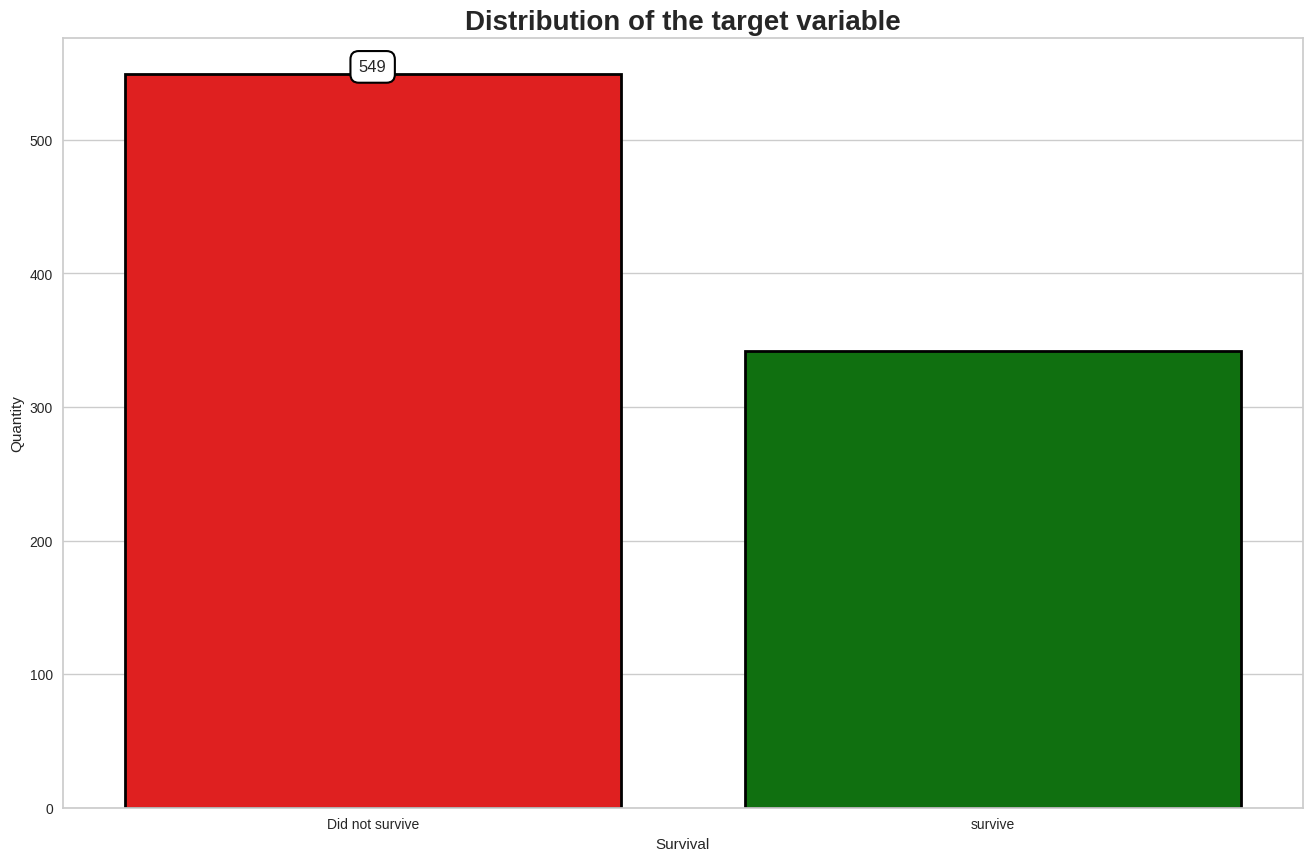

In [ ]:
fig = plt.subplots()
p1 = sns.countplot(data = df,
             x = 'Survived',
             palette = palette,
             edgecolor = 'black',
             linewidth = 2)
p1.bar_label(p1.containers[0], bbox = bbox)

plt.title('Distribution of the target variable', fontweight = 'bold')
plt.xlabel('Survival')
plt.ylabel('Quantity')
plt.xticks(ticks=[0, 1], labels=['Did not survive','survive'])

plt.show()

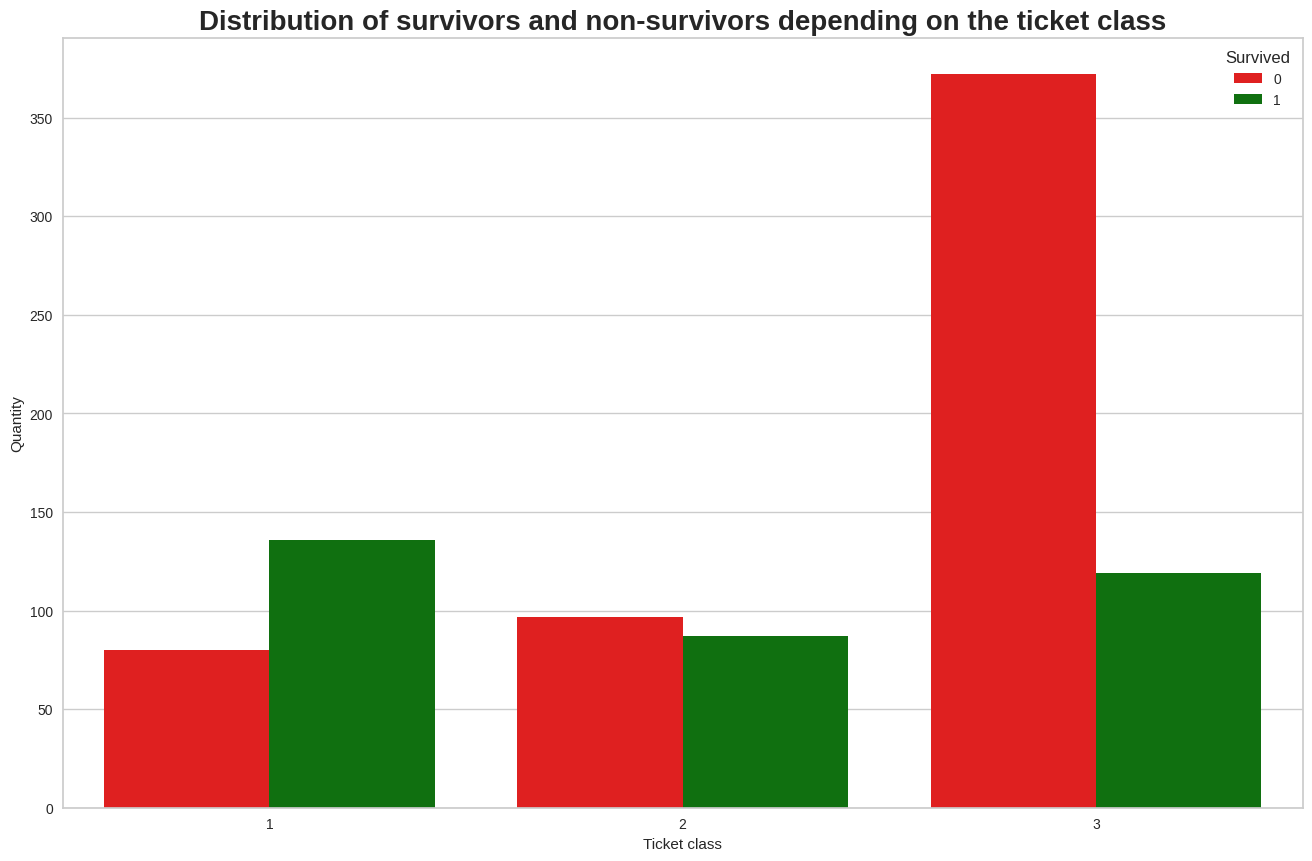

In [ ]:
sns.countplot(data = df,
             x = 'Pclass',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the ticket class',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Ticket class')
plt.show()

Серед тих, что був у третьому класі, більшість не вижили. І навпаки, серед тих, что був в 1 класі - більшість вижили.

In [ ]:
sns.countplot(data = df,
             x = 'Status',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the status of a person',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Human status')
plt.show()

    Серед Mr, Dr - більшість загинули
    Серед Mrs, Miss, Master - більшість вижили

    Ніхто з Don, Rev, Capt,Jonkheer не вижив
    Вижили всі зі статусами Me,Ms,Lady,Sir,Mille,the Countess



In [ ]:
sns.countplot(data = df,
             x = 'Sex',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the gender of the person',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Gender of the person')
plt.show()

Більшість чоловіків загинули, а більшість жінок врятувалася.


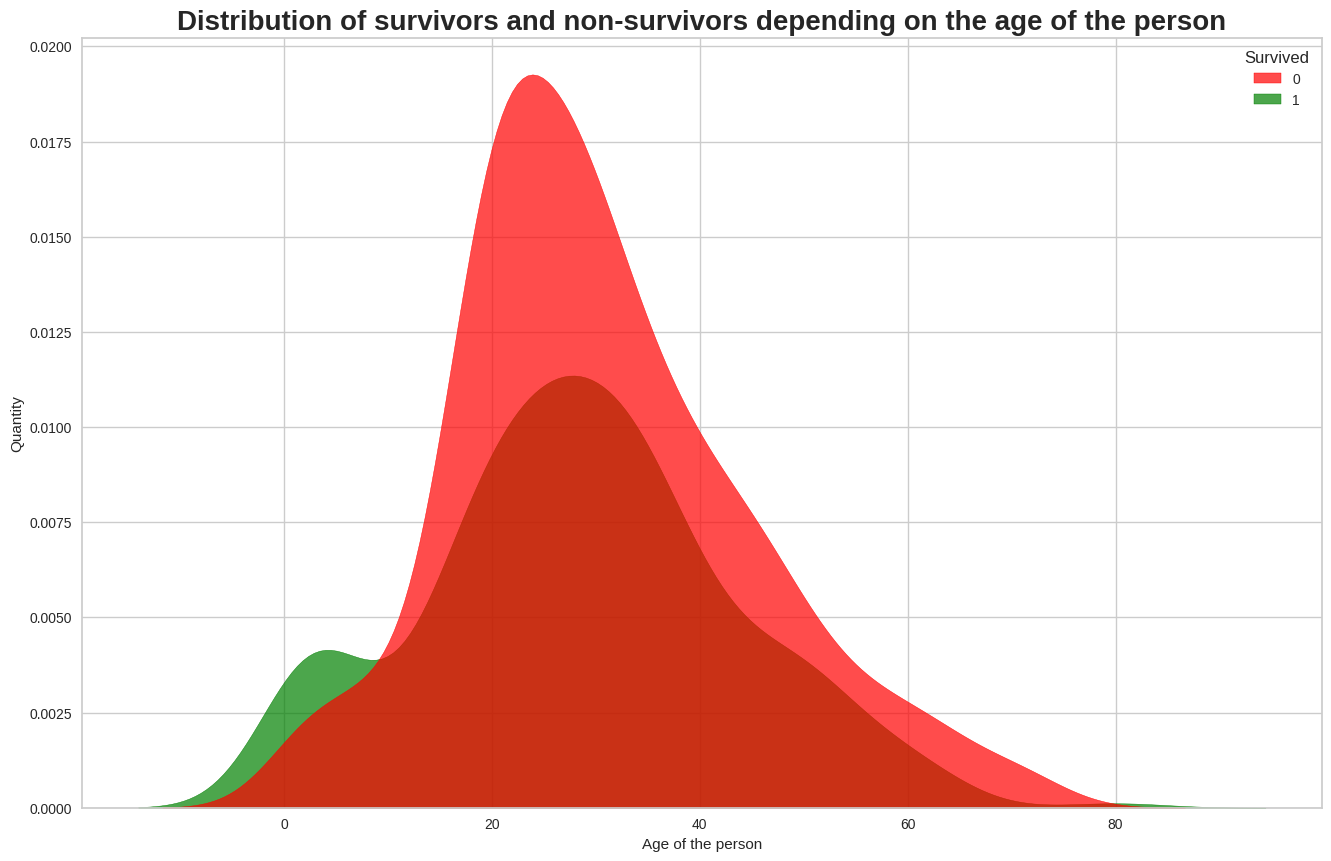

In [ ]:
sns.kdeplot(data = df,
           x = 'Age',
           hue = 'Survived',
           fill = True,
           alpha = 0.7,
           palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the age of the person',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Age of the person')
plt.show()

Більшість дітей вижили

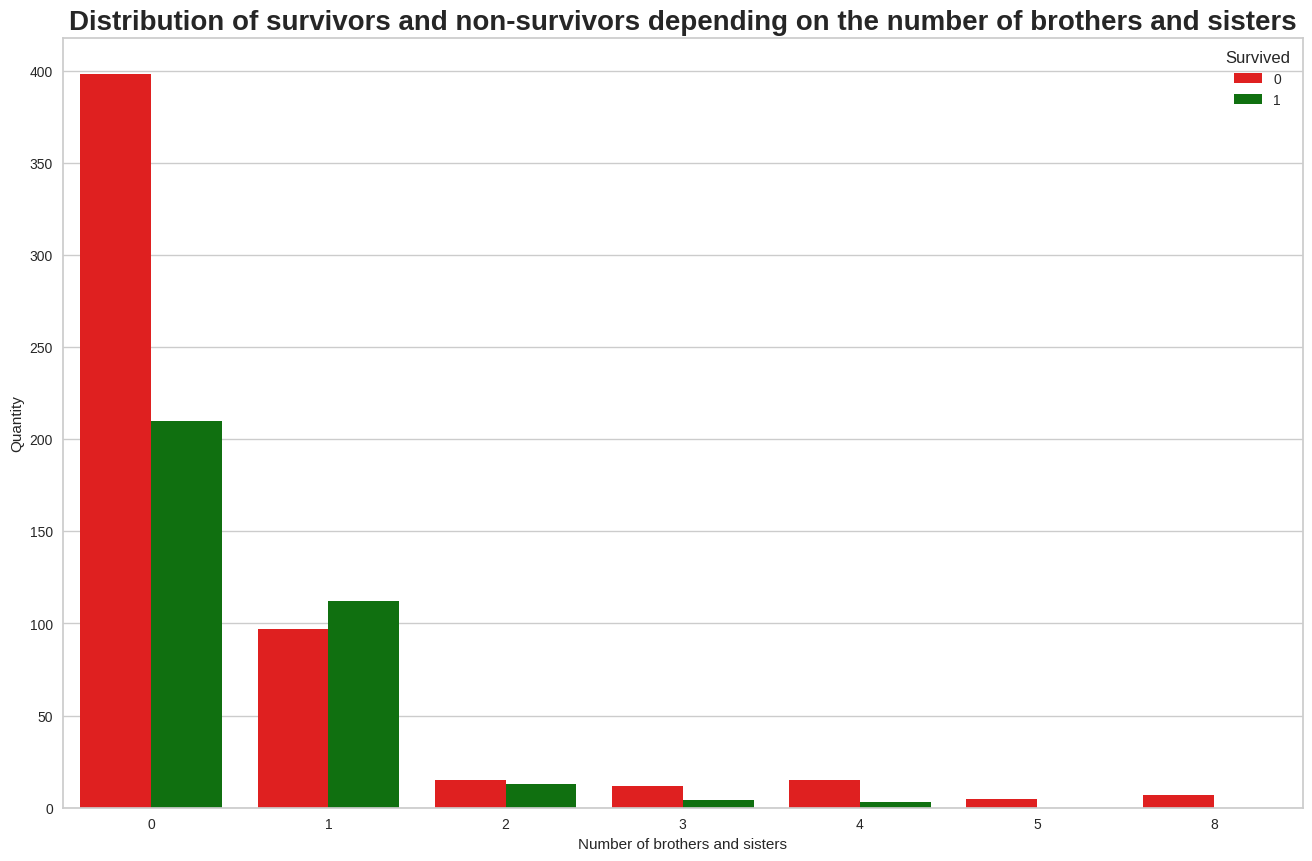

In [ ]:
sns.countplot(data = df,
             x = 'SibSp',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the number of brothers and sisters',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Number of brothers and sisters')
plt.show()


    Серед тих, чтьо мав 0, 2, 3, 4 братів і сестер, більшість не вижили
    Серед тих, что мав 1 брата чи сестру, більшість вижили
    Серед тих, что мав 5 чи 8 братів та сестер, ніхто не вижив


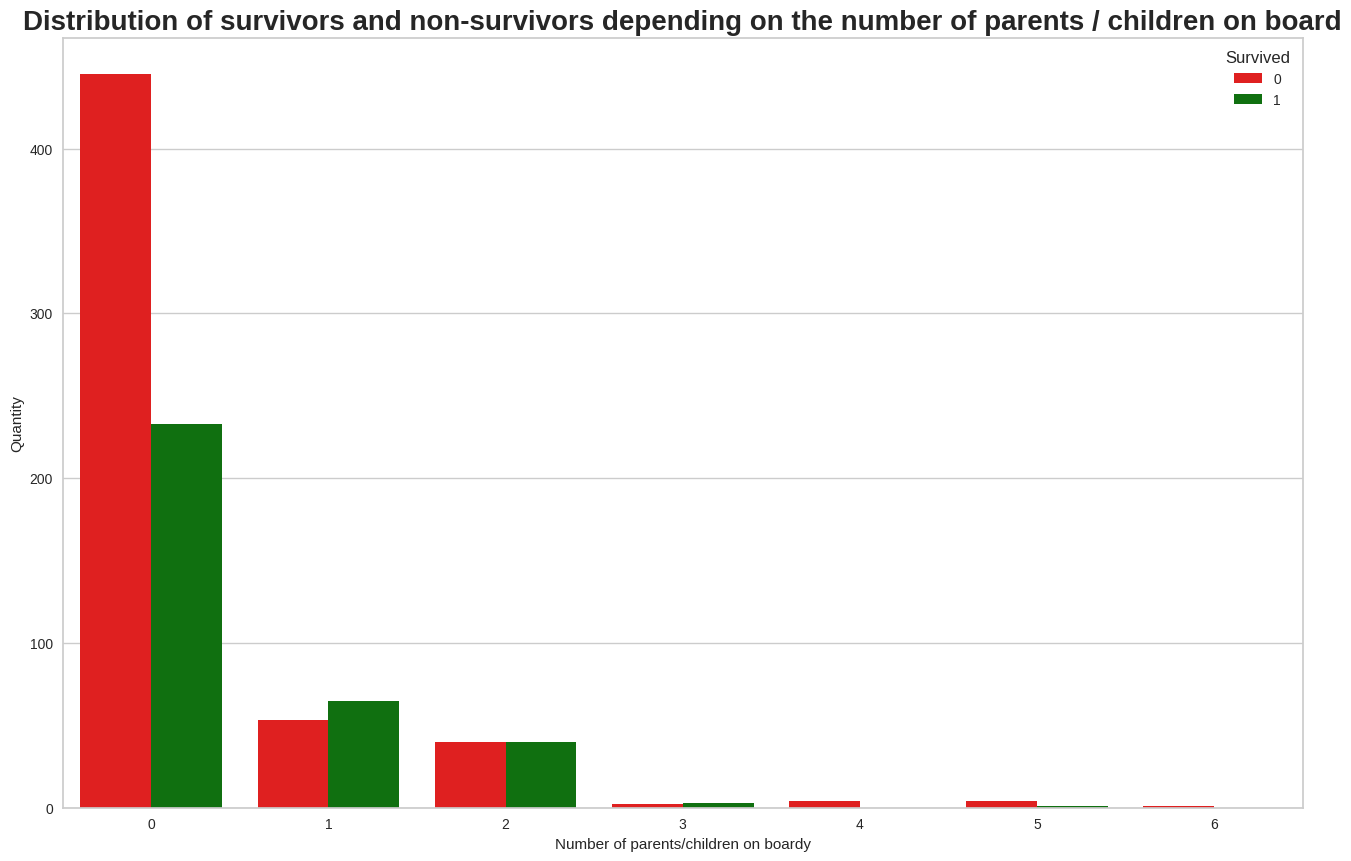

In [ ]:
sns.countplot(data = df,
             x = 'Parch',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the number of parents / children on board',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Number of parents/children on boardу')
plt.show()


    Серед тих, хто мав 0, 4, 5, 6 батьків чи дітей на борту, більшість загинула
    Серед тих, что мав 1 або 3 дітей на борту, більшість вижила
    У тих хто мав 2 батьків чи дітей, шанси вижити будли 50/50


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Number_Ticket,Fare,Count_Cabins
count,891.000000,891.000000,714.000000,891.000000,891.000000,8.910000e+02,891.000000,0.0
mean,0.383838,2.308642,29.699118,0.523008,0.381594,2.552204e+05,32.204208,NaN
std,0.486592,0.836071,14.526497,1.102743,0.806057,5.694927e+05,49.693429,NaN
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000e+00,0.000000,NaN
25%,0.000000,2.000000,20.125000,0.000000,0.000000,1.351850e+04,7.910400,NaN
50%,0.000000,3.000000,28.000000,0.000000,0.000000,1.108130e+05,14.454200,NaN
75%,1.000000,3.000000,38.000000,1.000000,0.000000,3.470735e+05,31.000000,NaN
max,1.000000,3.000000,80.000000,8.000000,6.000000,3.101317e+06,512.329200,NaN


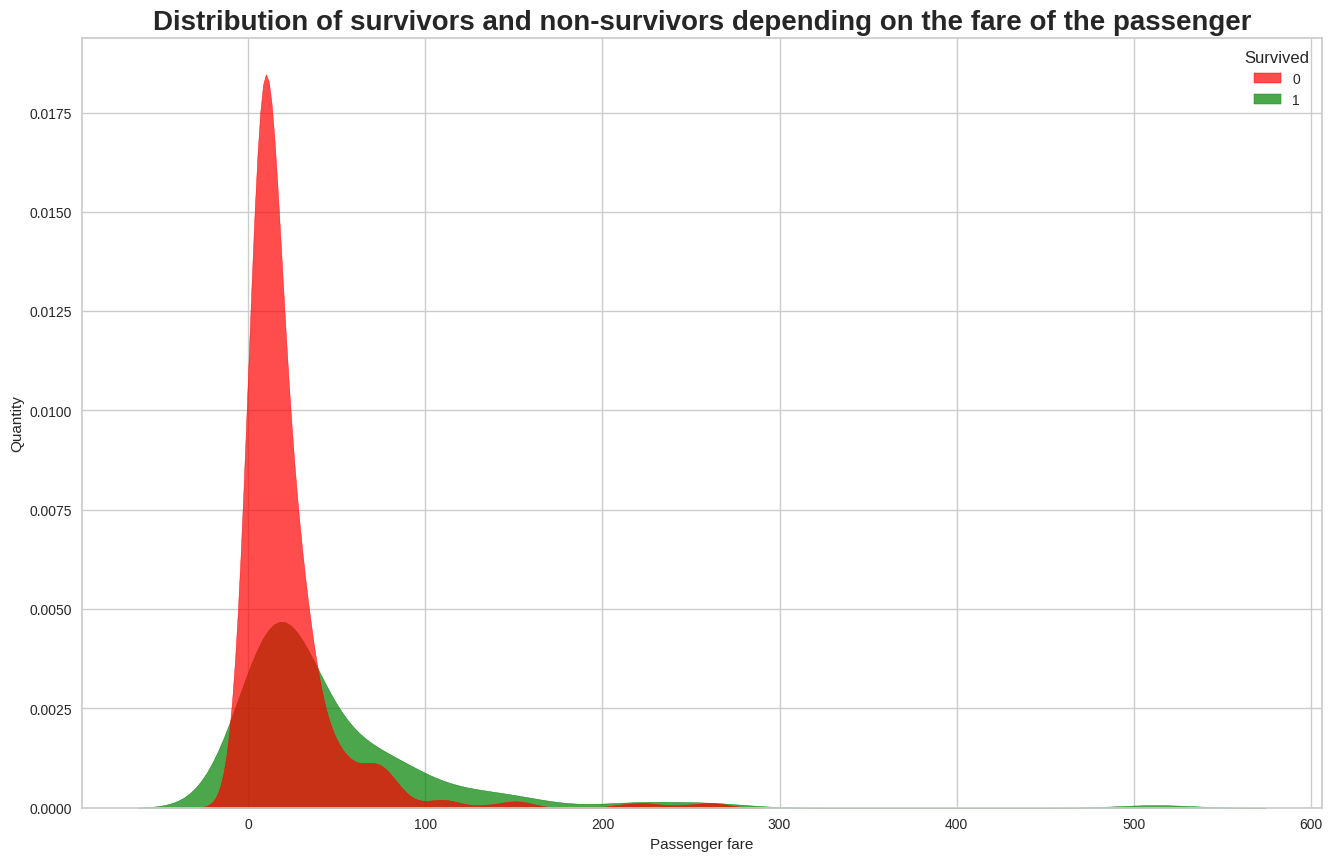

In [ ]:
sns.kdeplot(data = df,
           x = 'Fare',
           hue = 'Survived',
           fill = True,
           alpha = 0.7,
           palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the fare of the passenger',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Passenger fare')
# plt.xticks(range(0,600,20))
plt.show()


    Серед тих, у кого ціна білета була від 0 до 40, більшість загинули
    Серед тих, хто мав дорожчі квитки, більшість вижила


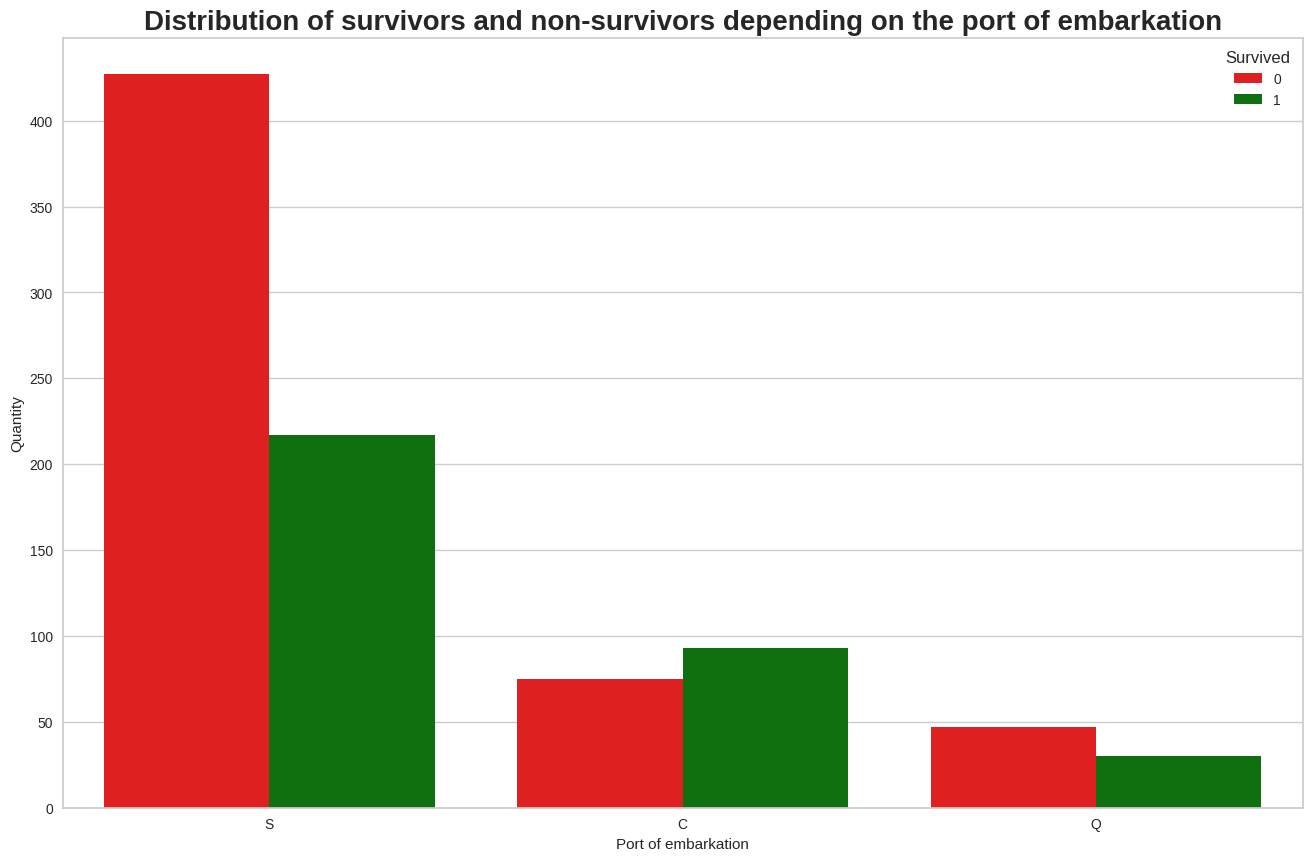

In [ ]:
sns.countplot(data = df,
             x = 'Embarked',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the port of embarkation',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Port of embarkation')
plt.show()


    C = Cherbourg,
    Q = Queenstown,
    S = Southampton

    Серед тих, хто сів в порту Southampton чи Queenstown більшість загинули
    Серед тих, хто сів у Cherbourg - більшість вижили


In [ ]:
df.head()

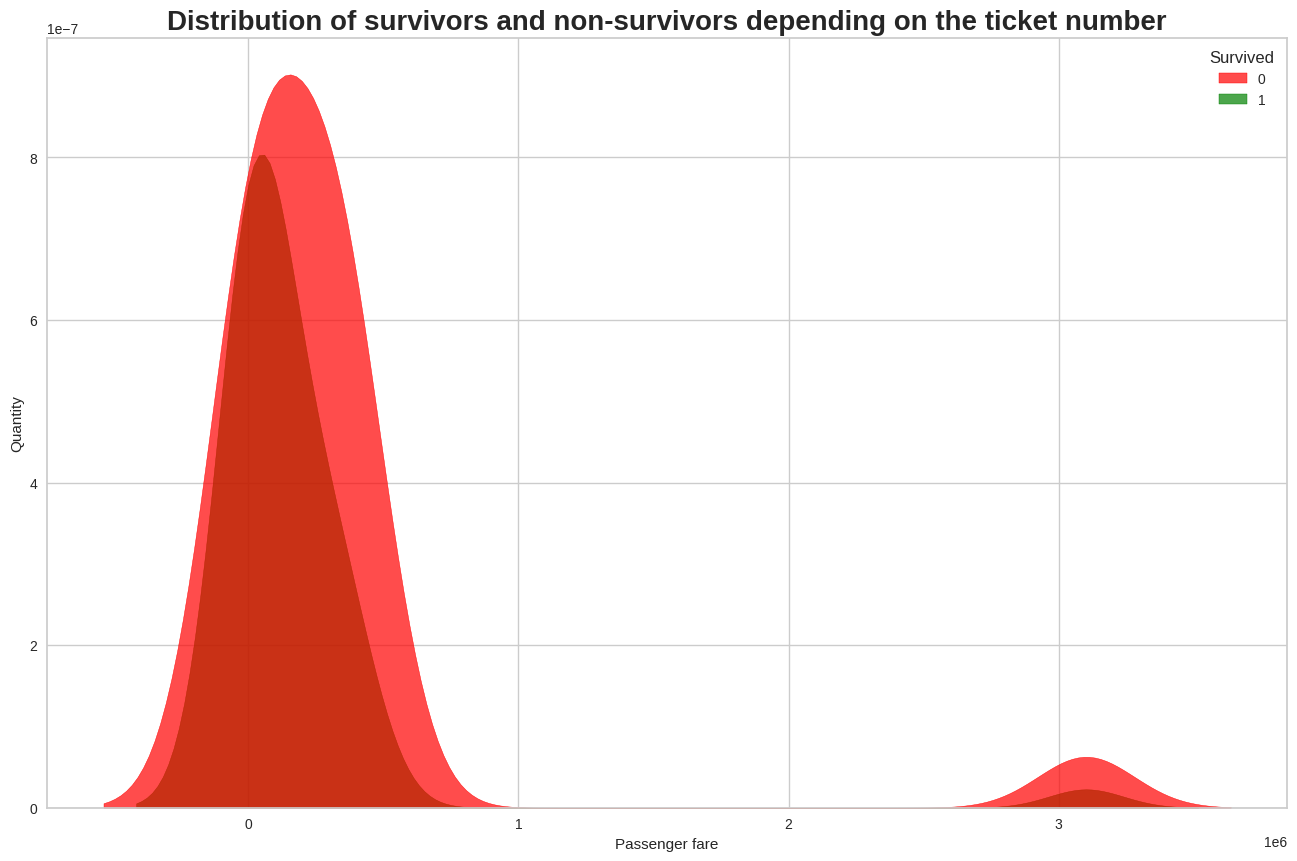

In [ ]:
sns.kdeplot(data = df,
           x = 'Number_Ticket',
           hue = 'Survived',
           fill = True,
           alpha = 0.7,
           palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the ticket number',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Passenger fare')
plt.show()

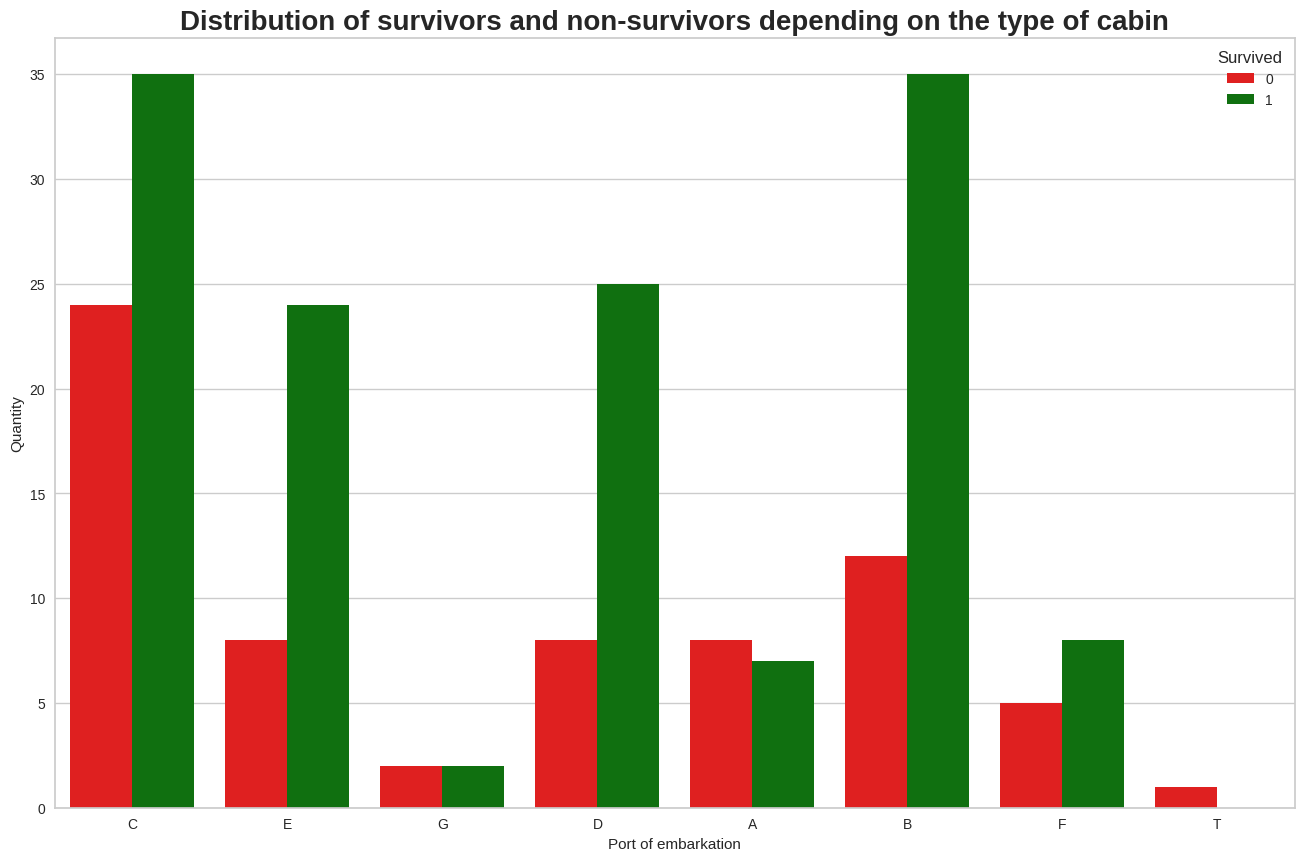

In [ ]:
sns.countplot(data = df[df['Cabin Type'].notna()],
             x = 'Cabin Type',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the type of cabin',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Port of embarkation')
plt.show()

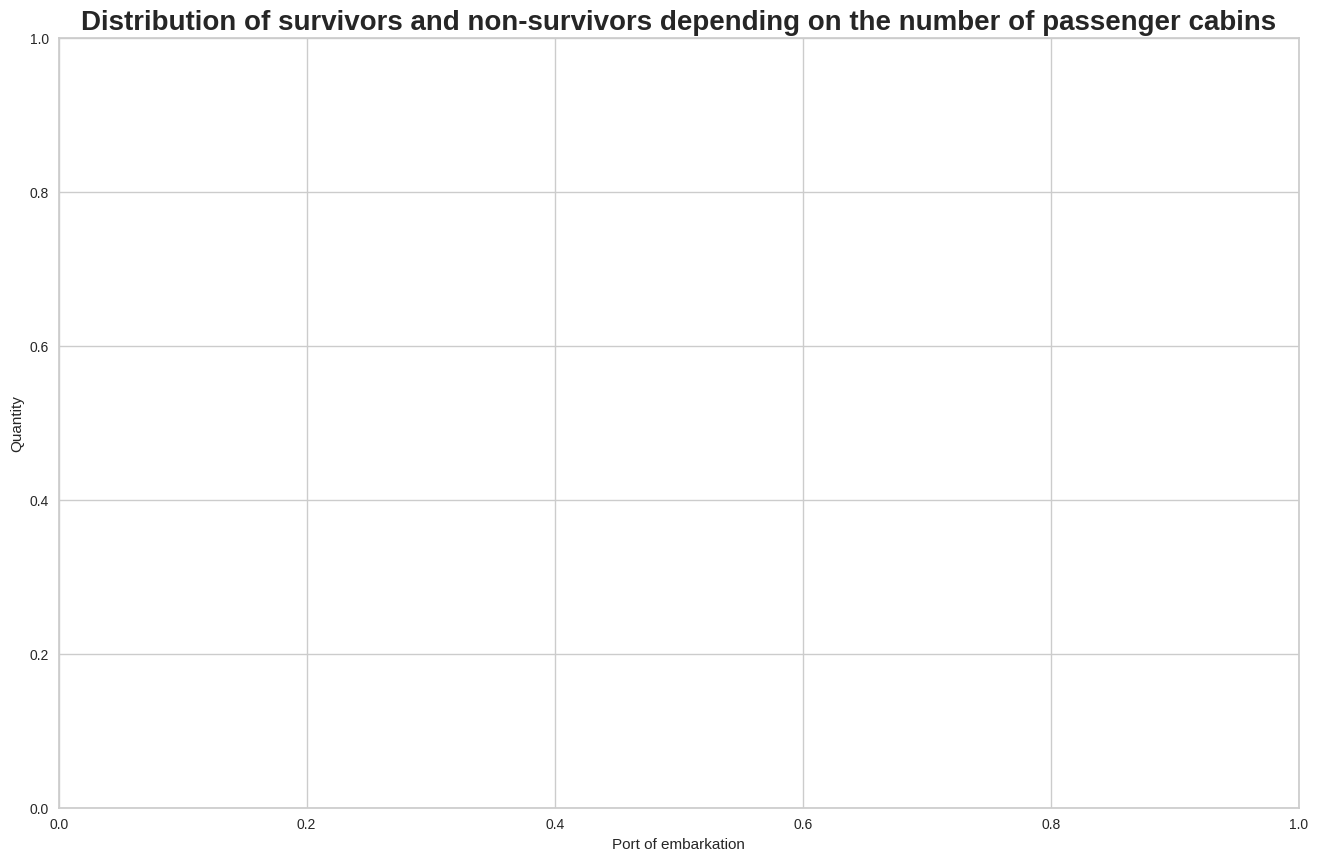

In [ ]:
sns.countplot(data = df[df['Count_Cabins'].notna()],
             x = 'Count_Cabins',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the number of passenger cabins',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Port of embarkation')
plt.show()

# Заповнення пропусків

In [ ]:

data = {
        'Not NaN' : df.notna().sum(),
        'NaN' : df.isna().sum(),
        '% NaN' : round((df.isna().sum() / df.shape[0])*100,2)
       }

data = pd.DataFrame(data)
data

,Not NaN,NaN,% NaN
Survived,891,0,0.00
Pclass,891,0,0.00
Status,891,0,0.00
Sex,891,0,0.00
Age,714,177,19.87
SibSp,891,0,0.00
Parch,891,0,0.00
Number_Ticket,891,0,0.00
Fare,891,0,0.00
Cabin Type,204,687,77.10


In [ ]:
lst = df['Status'].value_counts().index
mean_age = []

for l in lst:
    mean_age.append(df[(df['Status'] == l) & (df['Age'].notna())]['Age'].mean())

<Axes: xlabel='Status', ylabel='Age'>

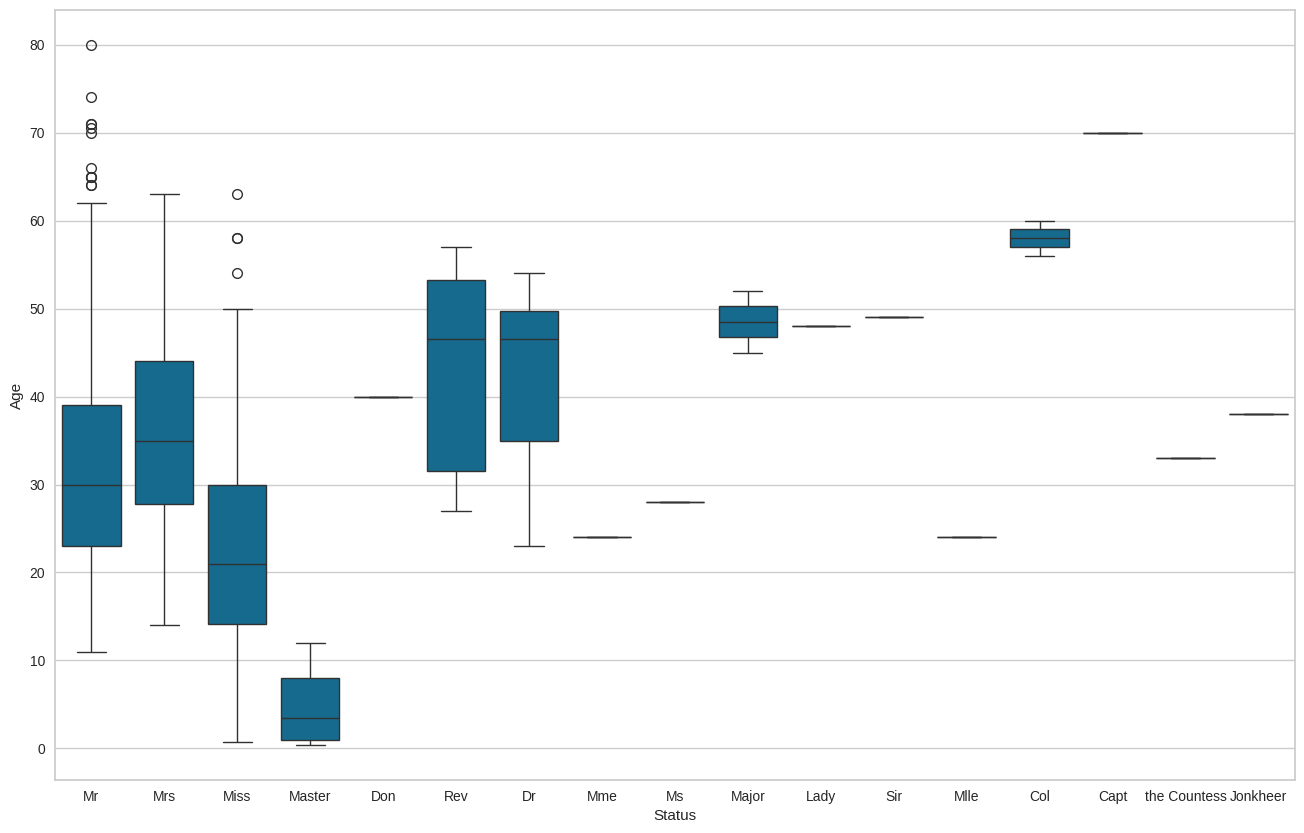

In [ ]:
sns.boxplot(df, x="Status", y="Age")

In [ ]:

data = {
        'mean_age' : mean_age
       }

data = pd.DataFrame(data)
data = data.set_index(df['Status'].value_counts().index)
data['mean_age'] = data['mean_age'].astype('int')
data

,mean_age
Status,
Mr,32
Miss,21
Mrs,35
Master,4
Dr,42
Rev,43
Mlle,24
Major,48
Col,58


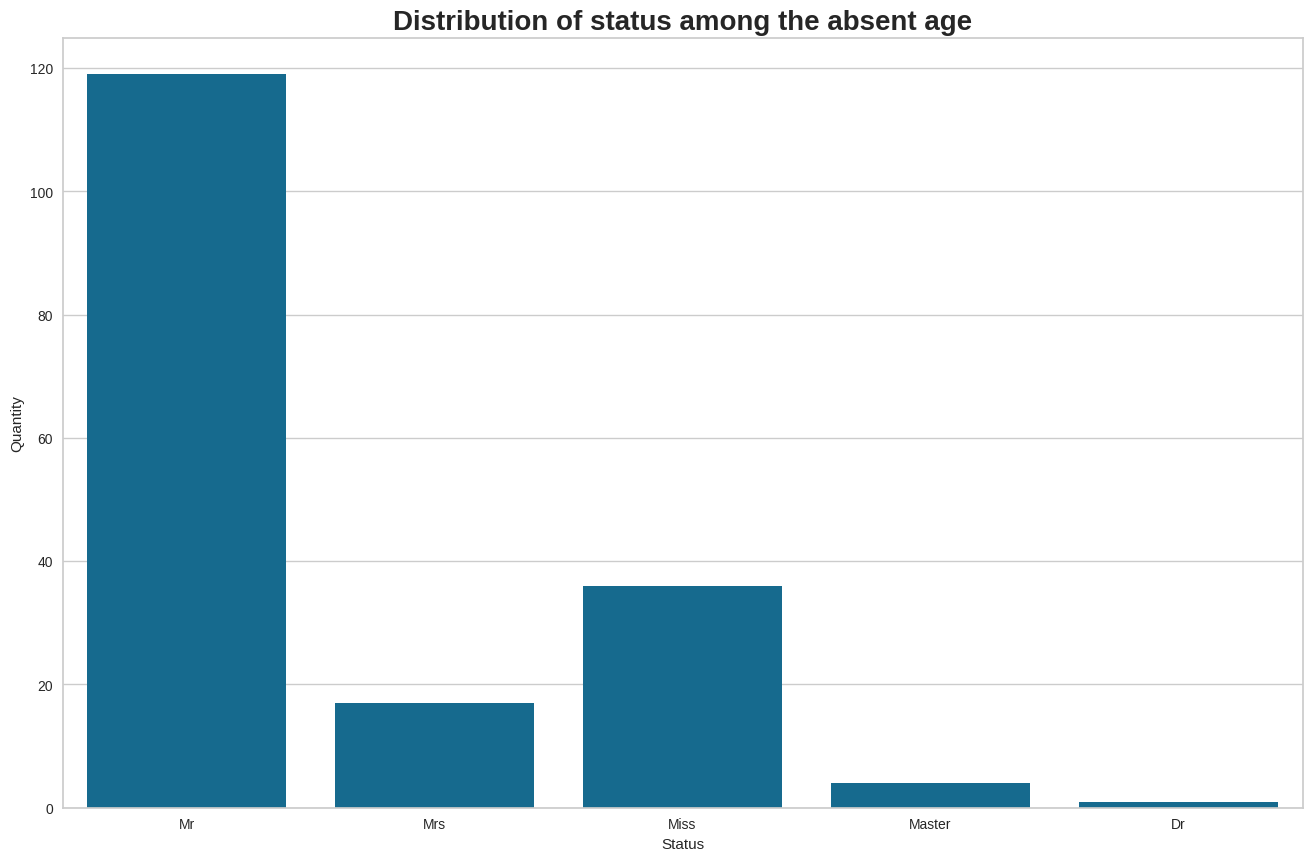

In [ ]:
sns.countplot(data = df[df['Age'].isna()],
             x = 'Status')
plt.title('Distribution of status among the absent age', fontweight = 'bold')
plt.xlabel('Status')
plt.ylabel('Quantity')
plt.show()

In [ ]:
df['Status'].nunique()

17


    Вік пропущений лише в наступних статусах:
    Mr
    Mrs
    Miss
    Master
    Dr

    Відповідно заповнюватимемо лише ці групи

In [ ]:
lst = df[df['Age'].isna()]['Status'].value_counts().index

for l in lst:
    df.loc[(df['Age'].isna())&(df['Status'] == l),'Age'] = df.loc[(df['Age'].isna())& (df['Status'] == l),'Age'].fillna(data.loc[l][0])

In [ ]:
df.isna().sum()

,0
Survived,0
Pclass,0
Status,0
Sex,0
Age,0
SibSp,0
Parch,0
Number_Ticket,0
Fare,0
Cabin Type,687



Як бачимо пропуски віку відсутні.
Заповнимо 2 наявні пропуски в колонці Embedded


In [ ]:
df[df['Embarked'].isna()]

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins


In [ ]:
Survived = df[df['Survived'] == 1]['Embarked'].mode()[0]
Pclass = df[df['Pclass'] == 1]['Embarked'].mode()[0]
Status_1 = df[df['Status'] == 'Miss']['Embarked'].mode()[0]
Status_2 = df[df['Status'] == 'Mrs']['Embarked'].mode()[0]
Sex = df[df['Sex'] == 'female']['Embarked'].mode()[0]
Age_38 = df[df['Age'] == 38]['Embarked'].mode()[0]
Age_62 = df[df['Age'] == 62]['Embarked'].mode()[0]
SibSp = df[df['SibSp'] == 0]['Embarked'].mode()[0]

lst = [Survived,Pclass,Status_1,Status_2,Sex,Age_38,Age_62,SibSp]

lst

['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']

In [ ]:
df.loc[df['Embarked'].isna(),'Embarked'] = df.loc[df['Embarked'].isna(),'Embarked'].fillna('S')

In [ ]:
index = df['Pclass'].value_counts().sort_index().index
pclass = []

for i in index:
    pclass.append(df[df['Pclass'] == i]['Cabin Type'].mode()[0])


Cabin_Type = {
        'Mode': pclass,

       }

Cabin_Type = pd.DataFrame(Cabin_Type)
Cabin_Type = Cabin_Type.set_index(index)
Cabin_Type

,Mode
Pclass,
1,C
2,F
3,F



    В 1 класі - тип каюти C
    В 2 класі - тип каюти - F
    В 3 класі - тип каюти - F


In [ ]:
for i in Cabin_Type.index:
    df.loc[(df['Cabin Type'].isna())&(df['Pclass'] == i),'Cabin Type'] = df.loc[(df['Cabin Type'].isna())&(df['Pclass'] == i),'Cabin Type'].fillna(Cabin_Type.loc[i][0])

In [ ]:
index = df['Cabin Type'].value_counts().sort_index().index
count = []
for i in index:
    count.append(df[df['Cabin Type'] == i]['Count_Cabins'].median())

Count_Cabins = {
        'Mode': count,

       }

Count_Cabins = pd.DataFrame(Count_Cabins)
Count_Cabins = Count_Cabins.set_index(index)
Count_Cabins

,Mode
Cabin Type,
A,NaN
B,NaN
C,NaN
D,NaN
E,NaN
F,NaN
G,NaN
T,NaN


In [ ]:
for i in Count_Cabins.index:
    df.loc[(df['Count_Cabins'].isna())&(df['Cabin Type'] == i),'Count_Cabins'] = df.loc[(df['Count_Cabins'].isna())&(df['Cabin Type'] == i),'Count_Cabins'].fillna(Count_Cabins.loc[i][0])

In [ ]:
# кількість NaN
data = {
        'Not NaN' : df.notna().sum(),
        'NaN' : df.isna().sum(),
        '% NaN' : round((df.isna().sum() / df.shape[0])*100,2)
       }

data = pd.DataFrame(data)
data

,Not NaN,NaN,% NaN
Survived,891,0,0.0
Pclass,891,0,0.0
Status,891,0,0.0
Sex,891,0,0.0
Age,891,0,0.0
SibSp,891,0,0.0
Parch,891,0,0.0
Number_Ticket,891,0,0.0
Fare,891,0,0.0
Cabin Type,891,0,0.0


In [ ]:
df.dtypes

# Кодування перемінних

In [ ]:
df.describe(include="object")

,Status,Sex,Cabin Type,Embarked
count,891,891,891,891
unique,17,2,8,3
top,Mr,male,F,S
freq,517,577,660,646


In [ ]:
df.Status.value_counts()

,count
Status,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [ ]:
df_c = df.copy()

In [ ]:
cat = ['Status','Sex','Embarked','Cabin Type']

for i in cat:
    unique = df[i].nunique()
    print(f'{i} = {unique} unique values')

Status = 17 unique values
Sex = 2 unique values
Embarked = 3 unique values
Cabin Type = 8 unique values


In [ ]:
encoder = LabelEncoder()

In [ ]:
for i in cat:
    df[i] = encoder.fit_transform(df[i])

In [ ]:
for i in cat:
    unique = df[i].nunique()
    print(f'{i} = {unique} unique values')

Status = 17 unique values
Sex = 2 unique values
Embarked = 3 unique values
Cabin Type = 8 unique values


In [ ]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,11,1,22.0,1,0,21171,7.2500,5,2,NaN
1,1,1,12,0,38.0,1,0,17599,71.2833,2,0,NaN
2,1,3,8,0,26.0,0,0,3101282,7.9250,5,2,NaN
3,1,1,12,0,35.0,1,0,113803,53.1000,2,2,NaN
4,0,3,11,1,35.0,0,0,373450,8.0500,5,2,NaN


In [ ]:
df.dtypes

,0
Survived,int64
Pclass,int64
Status,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Number_Ticket,int64
Fare,float64
Cabin Type,int64


In [ ]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,11,1,22.0,1,0,21171,7.2500,5,2,NaN
1,1,1,12,0,38.0,1,0,17599,71.2833,2,0,NaN
2,1,3,8,0,26.0,0,0,3101282,7.9250,5,2,NaN
3,1,1,12,0,35.0,1,0,113803,53.1000,2,2,NaN
4,0,3,11,1,35.0,0,0,373450,8.0500,5,2,NaN


KeyboardInterrupt: 

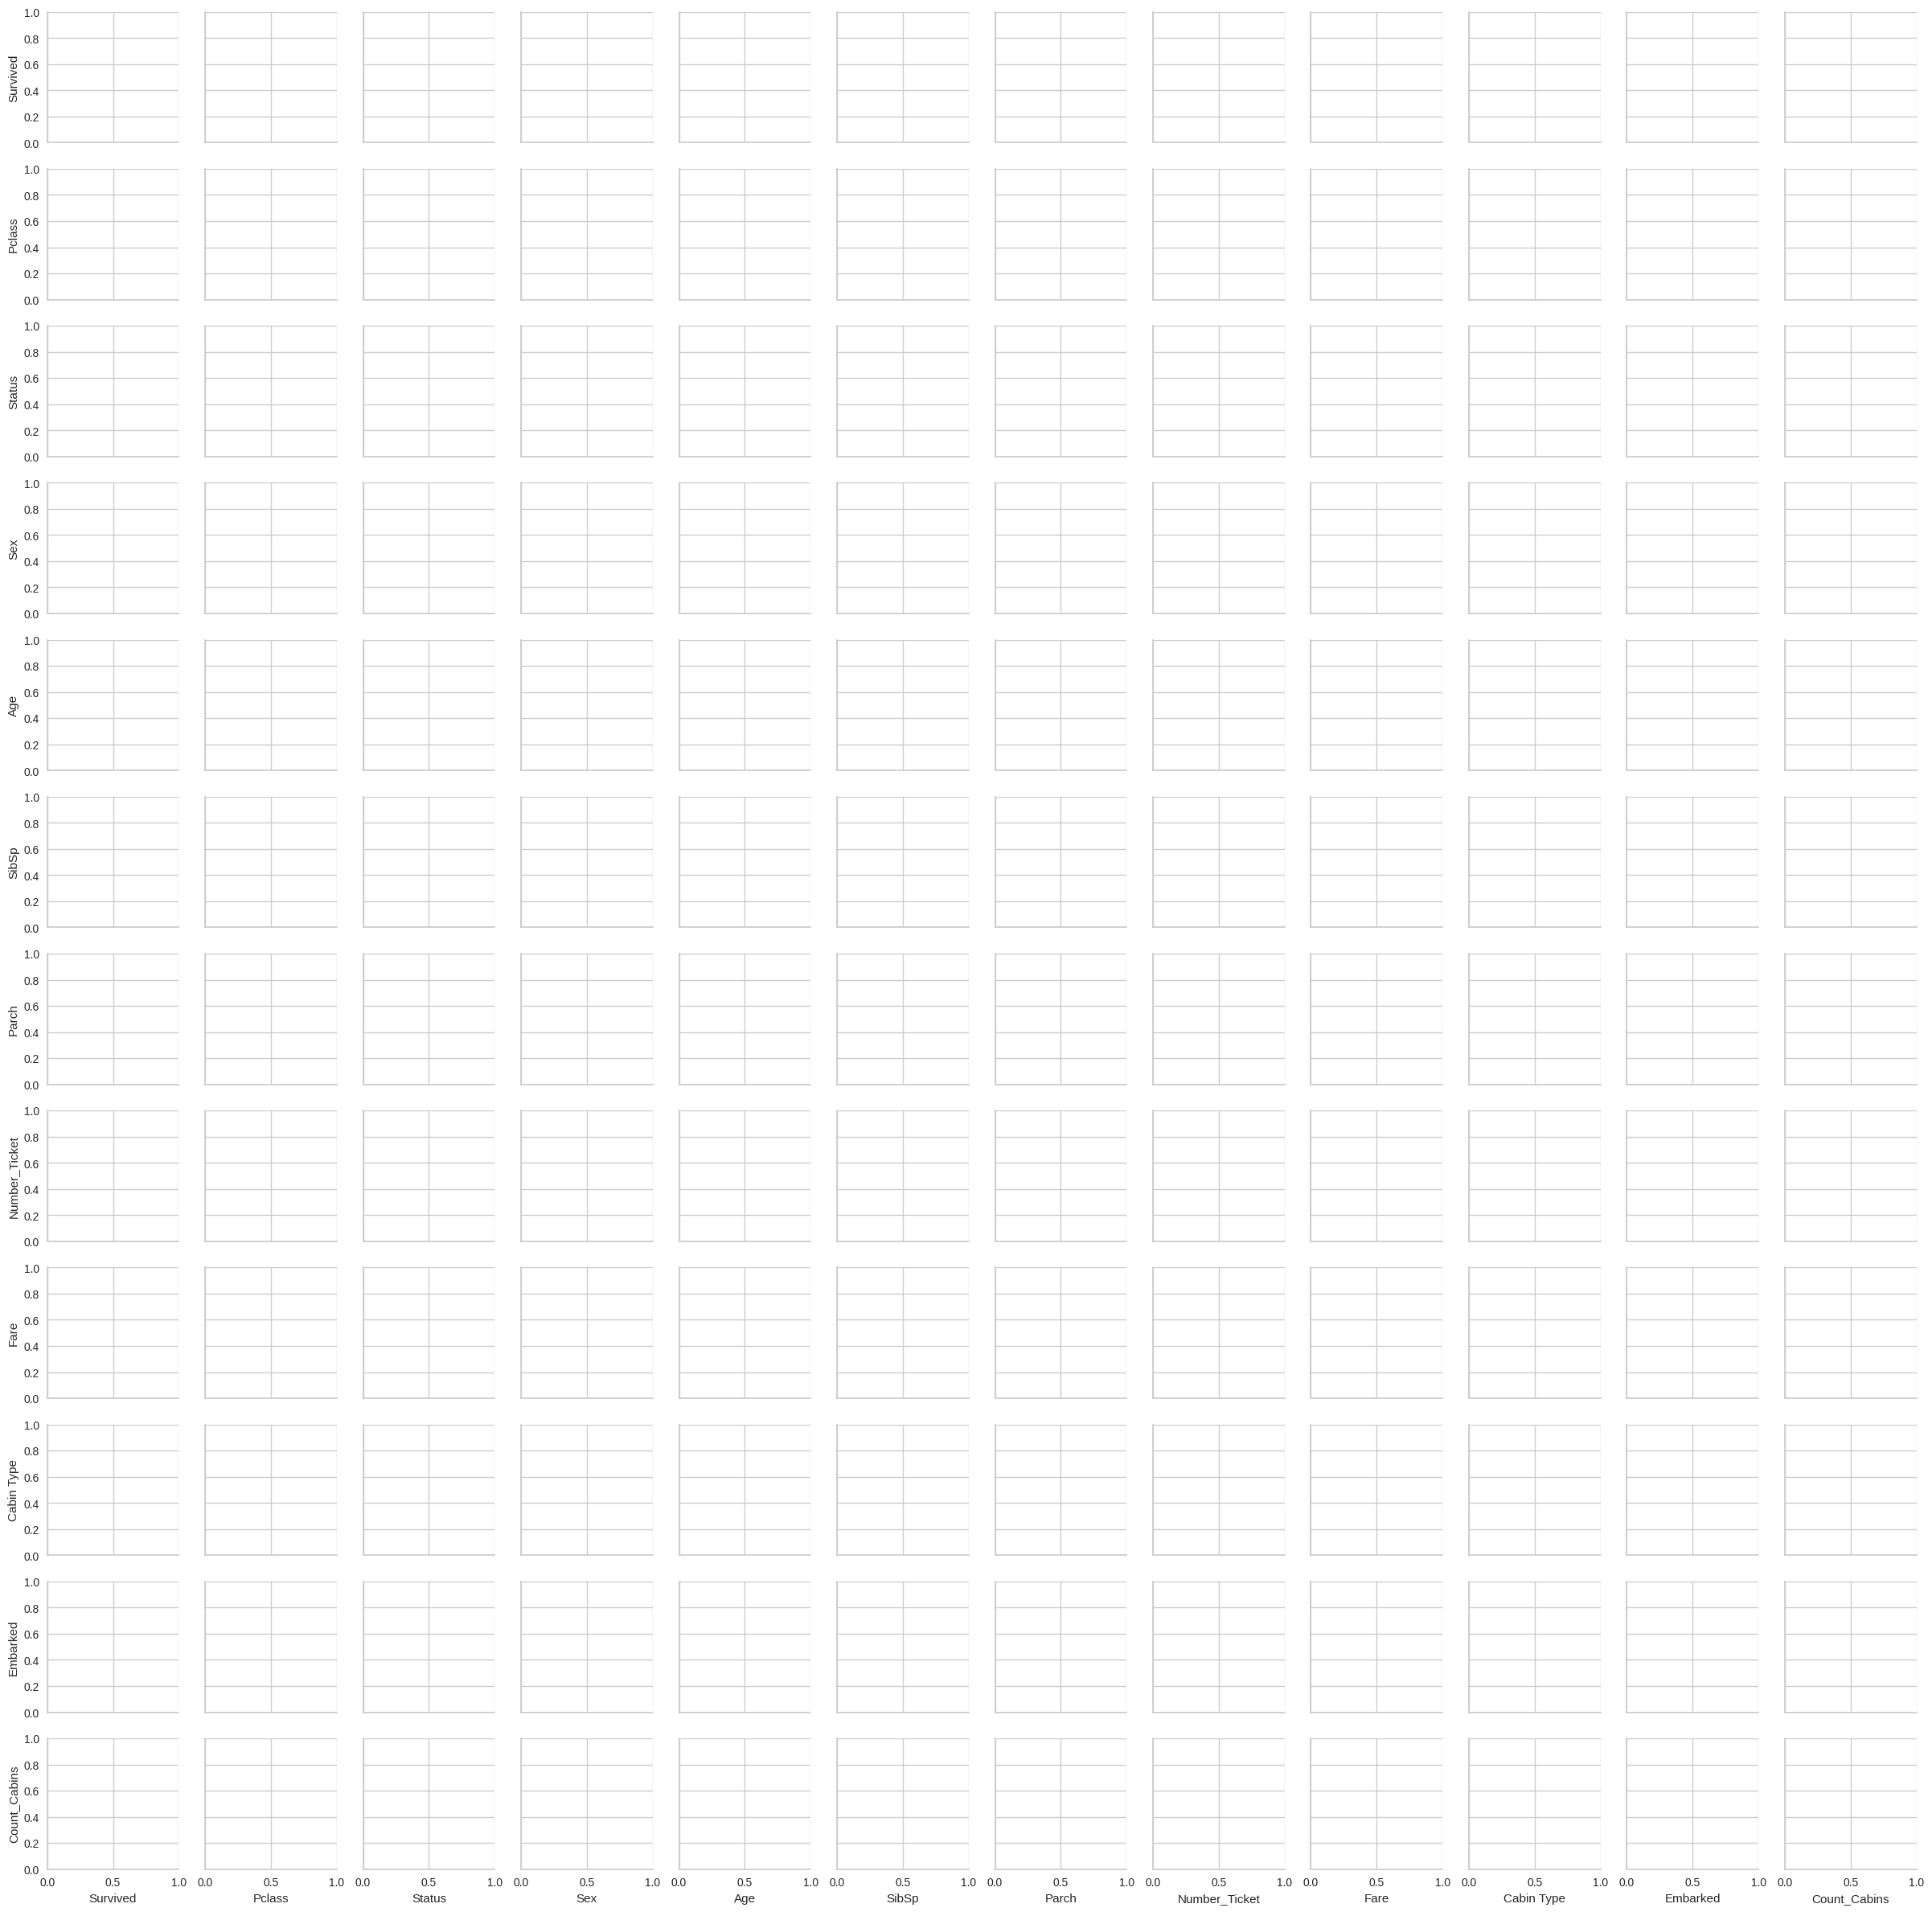

In [ ]:
sns.pairplot(df)

# Splitting the data set into explanatory and target variables

In [ ]:
df = df_c.copy()

In [ ]:
df = pd.get_dummies(df, columns=['Sex','Embarked', 'Cabin Type', 'Status'], drop_first=True)

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Number_Ticket,Fare,Count_Cabins,Sex_male,Embarked_Q,...,Status_Master,Status_Miss,Status_Mlle,Status_Mme,Status_Mr,Status_Mrs,Status_Ms,Status_Rev,Status_Sir,Status_the Countess
0,0,3,22.0,1,0,21171,7.2500,NaN,True,False,...,False,False,False,False,True,False,False,False,False,False
1,1,1,38.0,1,0,17599,71.2833,NaN,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1,3,26.0,0,0,3101282,7.9250,NaN,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,1,35.0,1,0,113803,53.1000,NaN,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,3,35.0,0,0,373450,8.0500,NaN,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,211536,13.0000,NaN,True,False,...,False,False,False,False,False,False,False,True,False,False
887,1,1,19.0,0,0,112053,30.0000,NaN,False,False,...,False,True,False,False,False,False,False,False,False,False
888,0,3,21.0,1,2,6607,23.4500,NaN,False,False,...,False,True,False,False,False,False,False,False,False,False
889,1,1,26.0,0,0,111369,30.0000,NaN,True,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
X = df.drop(['Survived', 'Count_Cabins'], axis=1)
y = df['Survived']

# Mutual information assessment


    mutual_info_classif-
    оцінка взаємної інформації між ознаками та цільовою змінною в класифікаційних завданнях.

    Взаємна інформація вимірює зв'язок між двома змінними.
    У разі класифікації це дозволяє визначити, наскільки інформативна кожна ознака щодо цільової змінної.
    Чим вище значення взаємної інформації, тим сильніший зв'язок між атрибутом і цільовою змінною.

    mutual_info_classic використовує entropy-based метод оцінки взаємної інформації.
    Розраховується для кожного параметра не беручи до уваги решти.
    Таким чино це некореляційна метрика "uncorrelated", тому вона не враховує залежності між параметрами.


In [ ]:
mi = mutual_info_classif(X, y)
mutual_info = []
for i, column in enumerate(X.columns):
    mutual_info.append(mi[i])

In [ ]:
data = {'Mutual information' : mutual_info }

data = pd.DataFrame(data)
data = data.set_index(X.columns)
data = data.sort_values(by = 'Mutual information', ascending = False)
data

<Axes: >

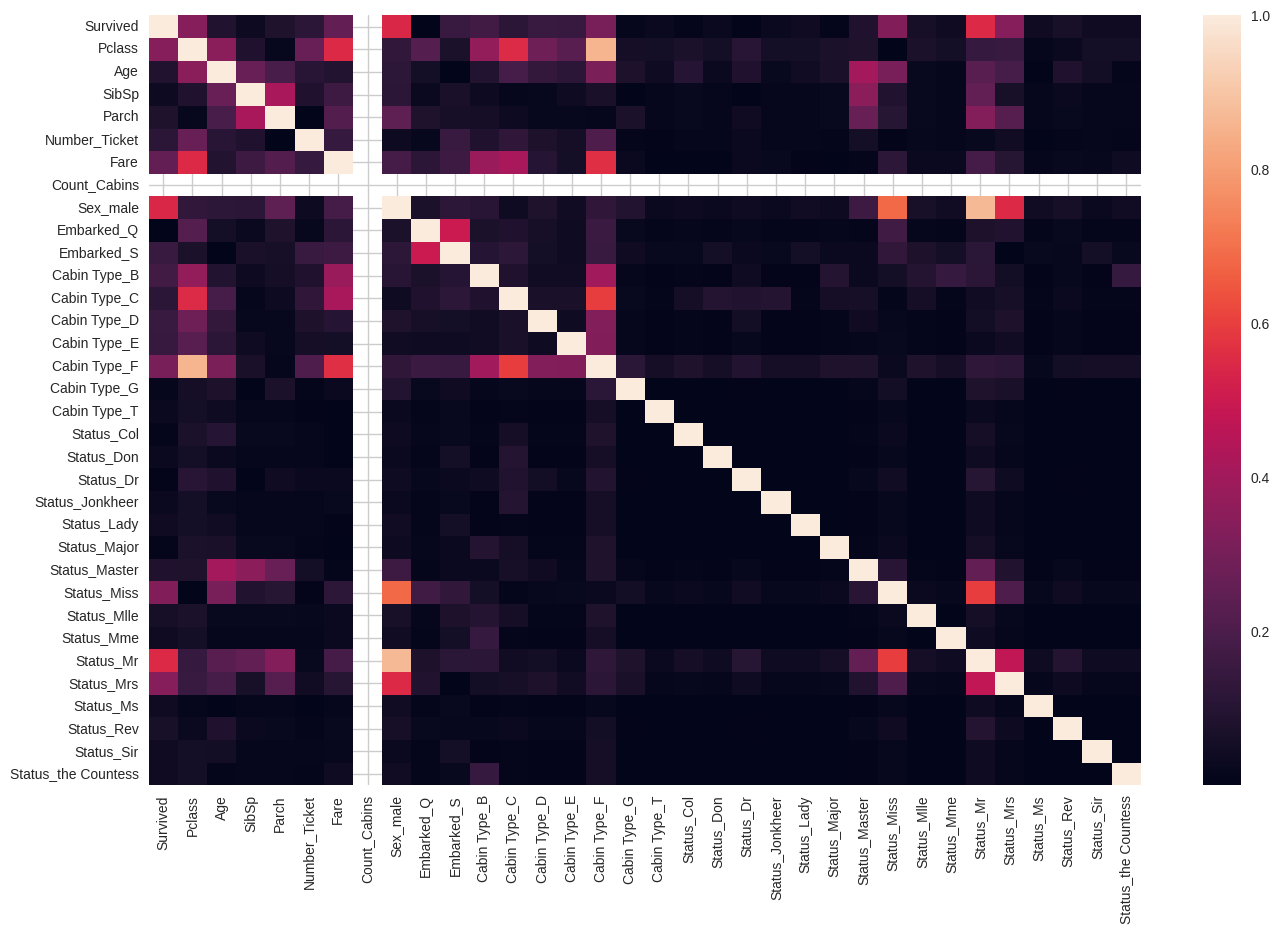

In [ ]:
sns.heatmap(abs(df.corr()))

In [ ]:
sns.boxplot(df_c, x="Embarked", y='Age')

In [ ]:
sns.barplot(data = data,
           x = 'Mutual information',
           y = data.index,
           palette = 'Blues_r')
plt.title('Evaluation of mutual information between explanatory and target variables', fontweight = 'bold')
plt.ylabel('Variables')
plt.xlabel('Mutual information coefficient')
plt.show()


    Параметр Status має найвищу оцінку взаємної інформації - цей атрибут містить багато інформації про цільову змінну
    і має з ним міцний зв’язок.

# Моделювання

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
print(np.isnan(X).sum())  # Количество NaN в массиве
model_LRb = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)


Pclass                 0
Age                    0
SibSp                  0
Parch                  0
Number_Ticket          0
Fare                   0
Sex_male               0
Embarked_Q             0
Embarked_S             0
Cabin Type_B           0
Cabin Type_C           0
Cabin Type_D           0
Cabin Type_E           0
Cabin Type_F           0
Cabin Type_G           0
Cabin Type_T           0
Status_Col             0
Status_Don             0
Status_Dr              0
Status_Jonkheer        0
Status_Lady            0
Status_Major           0
Status_Master          0
Status_Miss            0
Status_Mlle            0
Status_Mme             0
Status_Mr              0
Status_Mrs             0
Status_Ms              0
Status_Rev             0
Status_Sir             0
Status_the Countess    0
dtype: int64


In [ ]:
model_LRb.classes_

array([0, 1])

In [ ]:
pd.DataFrame({'Feature': X.columns.tolist(), 'Coef': model_LRb.coef_[0]})

,Feature,Coef
0,Pclass,-1.227400e-03
1,Age,-1.265191e-02
2,SibSp,-2.607730e-04
3,Parch,-4.016218e-06
4,Number_Ticket,-7.234974e-07
5,Fare,8.688282e-03
6,Sex_male,-7.783833e-04
7,Embarked_Q,-1.385379e-05
8,Embarked_S,-3.464122e-04
9,Cabin Type_B,5.188480e-05


In [ ]:
model_LRb.coef_

array([[-1.22739974e-03, -1.26519060e-02, -2.60773047e-04,
        -4.01621837e-06, -7.23497402e-07,  8.68828248e-03,
        -7.78383287e-04, -1.38537870e-05, -3.46412211e-04,
         5.18847997e-05,  1.27716793e-05,  4.39498581e-05,
         4.43158694e-05, -4.71687023e-04,  8.95474715e-07,
        -2.47078174e-06,  2.96003282e-07, -2.58245542e-06,
        -2.30186474e-06, -2.49766427e-06,  2.65868701e-06,
         3.84218447e-07,  2.74149041e-05,  2.25139086e-04,
         5.07011414e-06,  2.50385550e-06, -7.82427973e-04,
         2.12782855e-04,  2.96159390e-06, -1.39221858e-05,
         2.61425240e-06,  2.59259354e-06]])

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Number_Ticket,Fare,Count_Cabins,Sex_male,Embarked_Q,...,Status_Master,Status_Miss,Status_Mlle,Status_Mme,Status_Mr,Status_Mrs,Status_Ms,Status_Rev,Status_Sir,Status_the Countess
0,0,3,22.0,1,0,21171,7.2500,NaN,True,False,...,False,False,False,False,True,False,False,False,False,False
1,1,1,38.0,1,0,17599,71.2833,NaN,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1,3,26.0,0,0,3101282,7.9250,NaN,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,1,35.0,1,0,113803,53.1000,NaN,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,3,35.0,0,0,373450,8.0500,NaN,True,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
model_LRb.predict_proba(X)

array([[0.55905135, 0.44094865],
       [0.46897999, 0.53102001],
       [0.92473288, 0.07526712],
       ...,
       [0.51789133, 0.48210867],
       [0.53792046, 0.46207954],
       [0.64829279, 0.35170721]])

In [ ]:
model_LRb.score(X, y)

0.6891133557800224

In [ ]:
cm = confusion_matrix(y, model_LRb.predict(X))/len(y)
cm

array([[0.55780022, 0.05836139],
       [0.25252525, 0.13131313]])

<Axes: >

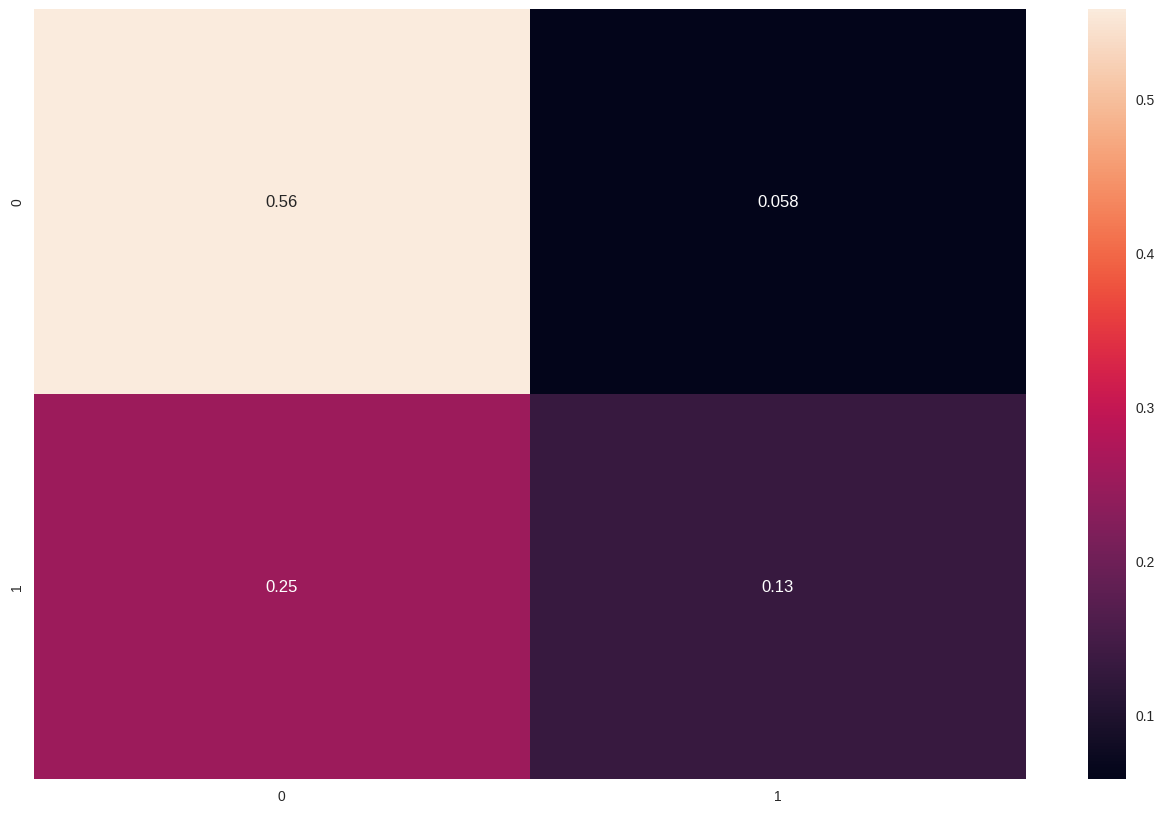

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
sc = StandardScaler()
X_ft = sc.fit_transform(X, y)

In [ ]:
model_LR = make_pipeline(
    # OneHotEncoder(handle_unknown="ignore"),
    # StandardScaler(),
    LogisticRegression(solver='liblinear', # newton-cg', 'lbfgs', 'sag', and 'saga'
                       random_state=0,
                       max_iter=500
                       )
)

In [ ]:
cv_results = cross_validate(model_LR, X_ft, y)
cv_results

{'fit_time': array([0.00759387, 0.00848436, 0.00804257, 0.00804019, 0.00998354]),
 'score_time': array([0.00144625, 0.00134659, 0.00210524, 0.00139451, 0.00144053]),
 'test_score': array([0.81005587, 0.82022472, 0.80337079, 0.80898876, 0.86516854])}

In [ ]:
score_LR = cv_results["test_score"]
print(f"The accuracy is: {score_LR.mean():.3f} ± {score_LR.std():.3f}")

The accuracy is: 0.822 ± 0.022


## Support Vector Classification

In [ ]:
model_SVC = svm.SVC(max_iter=1000)
model_SVC.fit(X, y.values.ravel())

SVC(max_iter=1000)

In [ ]:
score_SVC = model_SVC.score(X,y)
print(f'Estimation of determination accuracy: {score_SVC * 100:.2f}%')

Estimation of determination accuracy: 61.62%


## Decision tree

In [ ]:
model_DT = tree.DecisionTreeClassifier()

In [ ]:
model_DT.fit(X,y)

DecisionTreeClassifier()

In [ ]:
score_DT = model_DT.score(X,y)
print(f'Estimation of determination accuracy: {score_DT*100:.2f}%')

Estimation of determination accuracy: 99.78%


In [ ]:
df.shape

(891, 34)

## Decision trees (hyperparametres)

In [ ]:
model_DTh = tree.DecisionTreeClassifier()
parameters = {
    'criterion':['entropy', 'gini'],
    'max_depth': range(3,7),
    'min_samples_split': range(10,20),
    'min_samples_leaf': range(5,10)
}
grid_CV = GridSearchCV(model_DTh, parameters, cv = 5)

In [ ]:
%%time
grid_CV.fit(X,y)

CPU times: user 18.9 s, sys: 9.82 ms, total: 18.9 s
Wall time: 19.3 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 7),
                         'min_samples_leaf': range(5, 10),
                         'min_samples_split': range(10, 20)})

In [ ]:
model_DTh = grid_CV.best_estimator_

In [ ]:
print(f'Best classifier parameters:', grid_CV.best_params_)

Best classifier parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 10}


In [ ]:
score_DTh = model_DTh.score(X, y)
print(f'Estimation of determination accuracy: {score_DTh * 100:.2f}%')

Estimation of determination accuracy: 85.75%


In [ ]:
def visualize_DT_method(clf, X, name):
  export_graphviz(clf,feature_names = X.columns, out_file = name + '.dot', filled = True)
  # use the exclamation mark to call the terminal
  !dot -Tpng {name}.dot -o {name}.png
  display(Image(filename=name + '.png'))

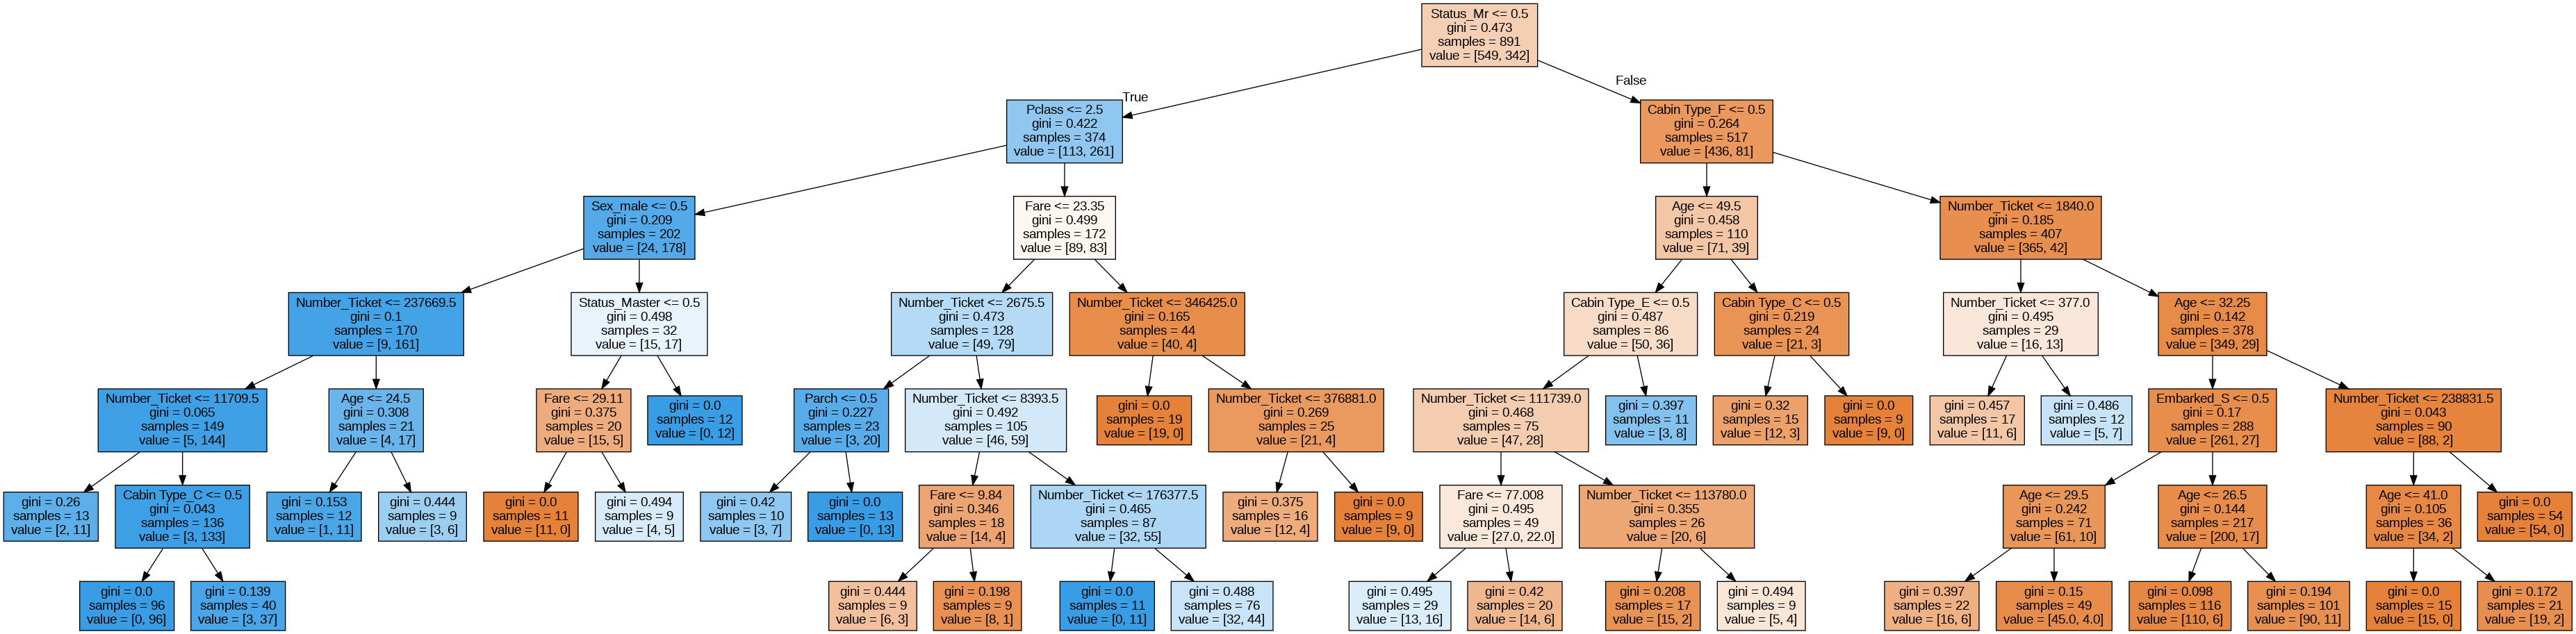

In [ ]:
visualize_DT_method(model_DTh, X, 'tree');

In [ ]:
feature_importance_DTh = pd.DataFrame({"feature": X.columns.to_list(), 'importance': model_DTh.feature_importances_}).sort_values("importance", ascending=False)
feature_importance_DTh

,feature,importance
26,Status_Mr,0.518737
0,Pclass,0.120480
4,Number_Ticket,0.105180
5,Fare,0.094421
13,Cabin Type_F,0.044650
6,Sex_male,0.038002
22,Status_Master,0.034431
1,Age,0.025301
12,Cabin Type_E,0.009808
3,Parch,0.004152


<Axes: xlabel='importance', ylabel='feature'>

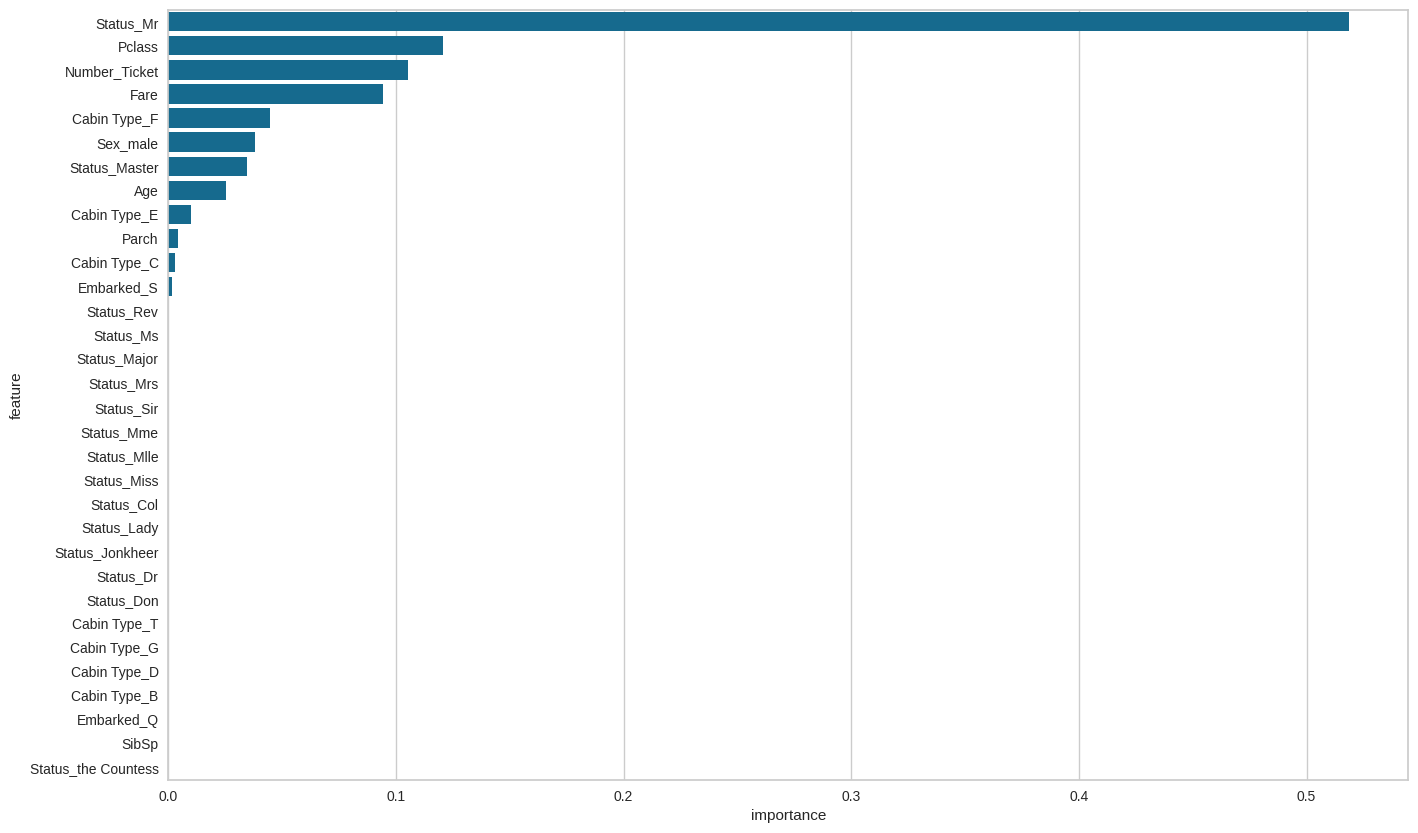

In [ ]:
sns.barplot(data = feature_importance_DTh, x = "importance", y = "feature")

## LightGBM

In [ ]:
model_LGBM = LGBMClassifier(max_depth=6, learning_rate=0.1,  num_leaves=10)

In [ ]:
model_LGBM.fit(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 495
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(max_depth=6, num_leaves=10)

In [ ]:
score_LGBM = model_LGBM.score(X, y)
print(f'Estimation of determination accuracy: {score_LGBM * 100:.2f}%')

Estimation of determination accuracy: 91.69%


## XGBClassifier

In [ ]:
model_XGB = XGB.XGBClassifier(max_depth=4, learning_rate=0.01)

In [ ]:
model_XGB.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
score_XGB = model_XGB.score(X, y)
print(f'Estimation of determination accuracy: {score_XGB*100:.2f}%')

Estimation of determination accuracy: 84.96%


## CatBoost

In [ ]:
model_CB = CatBoostClassifier(depth = 5, iterations = 50,
                                         l2_leaf_reg = 5, learning_rate = 0.5)

In [ ]:
model_CB.fit(X, y)

0:	learn: 0.5023945	total: 50.1ms	remaining: 2.45s
1:	learn: 0.4443695	total: 52.2ms	remaining: 1.25s
2:	learn: 0.4143380	total: 53.8ms	remaining: 843ms
3:	learn: 0.3938092	total: 55.3ms	remaining: 636ms
4:	learn: 0.3795560	total: 56.8ms	remaining: 511ms
5:	learn: 0.3678285	total: 58.2ms	remaining: 427ms
6:	learn: 0.3615853	total: 59.9ms	remaining: 368ms
7:	learn: 0.3576545	total: 61.3ms	remaining: 322ms
8:	learn: 0.3538486	total: 62.7ms	remaining: 286ms
9:	learn: 0.3462114	total: 64.2ms	remaining: 257ms
10:	learn: 0.3422494	total: 66.2ms	remaining: 235ms
11:	learn: 0.3382435	total: 67.9ms	remaining: 215ms
12:	learn: 0.3302200	total: 69.9ms	remaining: 199ms
13:	learn: 0.3276420	total: 71.5ms	remaining: 184ms
14:	learn: 0.3228676	total: 73ms	remaining: 170ms
15:	learn: 0.3154096	total: 74.9ms	remaining: 159ms
16:	learn: 0.3135447	total: 76.6ms	remaining: 149ms
17:	learn: 0.3128686	total: 78ms	remaining: 139ms
18:	learn: 0.3112623	total: 79.5ms	remaining: 130ms
19:	learn: 0.3046869	total

In [ ]:
score_CB = model_CB.score(X, y)
print(f'Estimation of determination accuracy: {score_CB * 100:.2f}%')

Estimation of determination accuracy: 94.16%


In [ ]:
print(f'Precision of the Logistic Regression method: {score_LR.mean() * 100:.2f}%')
print(f'Precision of the Support Vector Classification method: {score_SVC * 100:.2f}%')
print(f'Precision of the Decision Trees method with parameters: {score_DT * 100:.2f}%')
print(f'Precision of the Decision Trees method: {score_DTh * 100:.2f}%')
print(f'Precision of the LightGBM method: {score_LGBM * 100:.2f}%')
print(f'Precision of the XGBClassifier method: {score_XGB * 100:.2f}%')
print(f'Precision of the CatBoost method: {score_CB * 100:.2f}%')

Precision of the Logistic Regression method: 82.16%
Precision of the Support Vector Classification method: 61.62%
Precision of the Decision Trees method with parameters: 99.78%
Precision of the Decision Trees method: 85.75%
Precision of the LightGBM method: 91.69%
Precision of the XGBClassifier method: 84.96%
Precision of the CatBoost method: 94.16%


# Оцінка моделей

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
model_LRb_a = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
model_LRb.score(X, y)

In [ ]:
model_LRb_a.score(X_train, y_train)

In [ ]:
model_LRb.score(X_test, y_test)

In [ ]:
model_LRb_a.score(X_test, y_test)

In [ ]:
cm_train = confusion_matrix(y_train, model_LRb_a.predict(X_train))/len(y_train)
cm_train

In [ ]:
cm_test = confusion_matrix(y_test, model_LRb_a.predict(X_test))/len(y_test)
cm_test

In [ ]:
sns.heatmap(cm_test, annot=True)

In [ ]:
y_pred = model_LRb_a.predict(X_test)

In [ ]:
f1_score(y_test, y_pred, average='weighted')

In [ ]:
precision_score(y_test, y_pred)

In [ ]:
roc_auc_score(y_test, y_pred)

In [ ]:
visualizer = ROCAUC(model_LRb_a, classes=["Not survived", "Survived"])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
model_LR_a2 = make_pipeline(
    # OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(solver='liblinear', # newton-cg', 'lbfgs', 'sag', and 'saga'
                       random_state=0,
                       max_iter=500
                       )
)

In [ ]:
cv_results = cross_validate(model_LR_a2, X_train, y_train)
cv_results

In [ ]:
score_LR_a2 = cv_results["test_score"]
print(f"The accuracy is: {score_LR_a2.mean():.3f} ± {score_LR_a2.std():.3f}")

In [ ]:
cv_results_test = cross_validate(model_LR_a2, X_test, y_test)
cv_results_test

In [ ]:
score_LR_a2_test = cv_results_test["test_score"]
print(f"The accuracy is: {score_LR_a2_test.mean():.3f} ± {score_LR_a2_test.std():.3f}")

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10)
pca

In [ ]:
pca.fit(X)
PCA(n_components=2)
print(pca.explained_variance_ratio_)

In [ ]:
pca.explained_variance_

In [ ]:
pca.feature_names_in_

In [ ]:
cvm = cross_validate(model_DTh, X_train, y_train)
cvm

# HOME_WORK_WORKSHOP_2_3_improvement_models

Accuracy (без оптимізації): 0.824 ± 0.021
Найкраща точність: 0.824
Найкращі параметри: {'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__solver': 'lbfgs'}

Коэффициенты модели:
[-0.60199786 -0.37875485 -0.50549366 -0.24265032 -0.09196869  0.18480278
 -0.5417739  -0.03191361 -0.15302606  0.05606897 -0.06857339  0.1719109
  0.21757554 -0.11293452 -0.05817971 -0.08632832  0.00639303 -0.11997024
 -0.03778197 -0.10980856  0.08078679 -0.00305215  0.37260641  0.19326481
  0.07731134  0.04840767 -0.5455178   0.44084763  0.09125087 -0.21544884
  0.10765635  0.05993767]

Точність моделі: 0.842


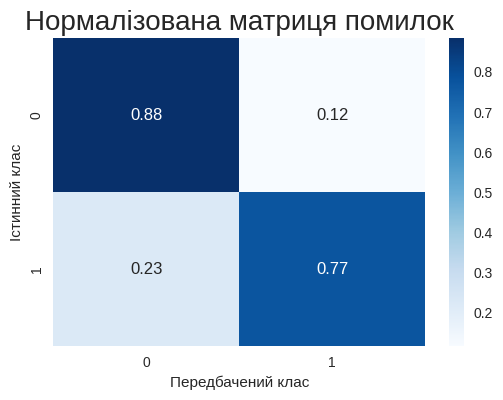

In [ ]:

from sklearn.impute import SimpleImputer


model_LR = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=0, max_iter=500))
])

cv_results = cross_validate(model_LR, X, y, cv=5, scoring='accuracy')
score_LR = cv_results["test_score"]
print(f"Accuracy (без оптимізації): {score_LR.mean():.3f} ± {score_LR.std():.3f}")

param_grid = {
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__solver': ['liblinear', 'lbfgs'],
    'classifier__max_iter': [100, 500, 1000]
}

grid_search = GridSearchCV(
    estimator=model_LR,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X, y)

print(f"Найкраща точність: {grid_search.best_score_:.3f}")
print(f"Найкращі параметри: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
best_model.fit(X, y)

coefficients = best_model.named_steps['classifier'].coef_
print("\nКоэффициенты модели:")
print(coefficients[0])

accuracy = best_model.score(X, y)
print(f"\nТочність моделі: {accuracy:.3f}")

y_pred = best_model.predict(X)
cm = confusion_matrix(y, y_pred)

cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Нормалізована матриця помилок")
plt.xlabel("Передбачений клас")
plt.ylabel("Істинний клас")
plt.show()




Accuracy (без оптимізації): 0.822 ± 0.021
Найкраща точність: 0.828
Найкращі параметри: {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf', 'classifier__max_iter': 500}


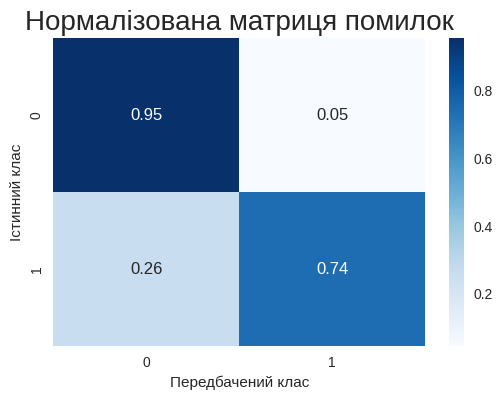

In [ ]:

from sklearn.svm import SVC

model_SVC = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=0))
])

cv_results = cross_validate(model_SVC, X, y, cv=5, scoring='accuracy')
score_SVC = cv_results["test_score"]
print(f"Accuracy (без оптимізації): {score_SVC.mean():.3f} ± {score_SVC.std():.3f}")

param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__max_iter': [100, 500, 1000]  # Добавлено для контроля числа итераций
}

grid_search = GridSearchCV(
    estimator=model_SVC,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X, y)

print(f"Найкраща точність: {grid_search.best_score_:.3f}")
print(f"Найкращі параметри: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
best_model.fit(X, y)

y_pred = best_model.predict(X)
cm = confusion_matrix(y, y_pred)

cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Нормалізована матриця помилок")
plt.xlabel("Передбачений клас")
plt.ylabel("Істинний клас")
plt.show()


Accuracy (без оптимізації): 0.820 ± 0.028
Найкраща точність: 0.848
Найкращі параметри: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}
Accuracy на тренувальних даних: 0.918


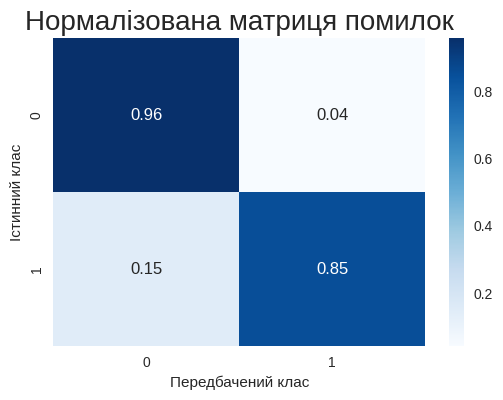

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier


# Побудова пайплайну з XGBClassifier
# XGBClassifier — це реалізація алгоритму Gradient Boosting з підтримкою GPU і оптимізацією швидкості для задач класифікації.
model_XGB = Pipeline([
    ('classifier', XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss'))  # Класифікатор XGBoost
])

# Крос-валідація перед оптимізацією
# Перевіряємо точність моделі без попереднього налаштування гіперпараметрів
cv_results = cross_validate(model_XGB, X, y, cv=5, scoring='accuracy')
score_XGB = cv_results["test_score"]
print(f"Accuracy (без оптимізації): {score_XGB.mean():.3f} ± {score_XGB.std():.3f}")

# Налаштування GridSearchCV
# Набір параметрів для підбору оптимальних значень гіперпараметрів XGBClassifier
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Кількість дерев у моделі
    'classifier__learning_rate': [0.01, 0.1, 0.2],  # Швидкість навчання
    'classifier__max_depth': [3, 5, 7],  # Максимальна глибина дерев
    'classifier__subsample': [0.8, 1.0],  # Частка вибірки для кожного дерева
    'classifier__colsample_bytree': [0.8, 1.0]  # Частка ознак для кожного дерева
}

# Ініціалізація GridSearchCV
grid_search = GridSearchCV(
    estimator=model_XGB,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Підбір гіперпараметрів
grid_search.fit(X, y)

# Виводимо найкращі параметри та точність після оптимізації
print(f"Найкраща точність: {grid_search.best_score_:.3f}")
print(f"Найкращі параметри: {grid_search.best_params_}")

# Фінальна модель з найкращими параметрами
best_model = grid_search.best_estimator_
best_model.fit(X, y)

# Передбачення та обчислення точності
y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy на тренувальних даних: {accuracy:.3f}")

# Матриця помилок
cm = confusion_matrix(y, y_pred)

# Нормалізована матриця помилок
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

# Візуалізація матриці помилок
plt.figure(figsize=(6, 4))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Нормалізована матриця помилок")
plt.xlabel("Передбачений клас")
plt.ylabel("Істинний клас")
plt.show()


Accuracy (без оптимізації): 0.841 ± 0.023
Найкраща точність: 0.851
Найкращі параметри: {'classifier__depth': 8, 'classifier__iterations': 300, 'classifier__l2_leaf_reg': 5, 'classifier__learning_rate': 0.1}
Accuracy на тренувальних даних: 0.982


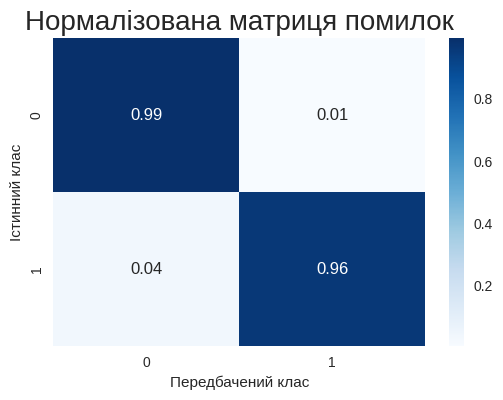

In [ ]:

from catboost import CatBoostClassifier

# Побудова пайплайну з CatBoostClassifier
# CatBoostClassifier — це алгоритм градієнтного бустингу, оптимізований для роботи з категоріальними ознаками.
model_CatBoost = Pipeline([
    ('classifier', CatBoostClassifier(random_state=0, verbose=0))  # Класифікатор CatBoost
])

# Крос-валідація перед оптимізацією
cv_results = cross_validate(model_CatBoost, X, y, cv=5, scoring='accuracy')
score_CatBoost = cv_results["test_score"]
print(f"Accuracy (без оптимізації): {score_CatBoost.mean():.3f} ± {score_CatBoost.std():.3f}")

# Налаштування GridSearchCV
param_grid = {
    'classifier__iterations': [100, 200, 300],  # Кількість ітерацій
    'classifier__learning_rate': [0.01, 0.1, 0.2],  # Швидкість навчання
    'classifier__depth': [4, 6, 8],  # Глибина дерев
    'classifier__l2_leaf_reg': [1, 3, 5]  # Регуляризація L2
}

grid_search = GridSearchCV(
    estimator=model_CatBoost,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Підбір гіперпараметрів
grid_search.fit(X, y)

# Вивід найкращих параметрів і точності
print(f"Найкраща точність: {grid_search.best_score_:.3f}")
print(f"Найкращі параметри: {grid_search.best_params_}")

# Фінальна модель з найкращими параметрами
best_model = grid_search.best_estimator_
best_model.fit(X, y)

# Передбачення
y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy на тренувальних даних: {accuracy:.3f}")

# Матриця помилок
cm = confusion_matrix(y, y_pred)

# Нормалізована матриця помилок
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

# Візуалізація матриці помилок
plt.figure(figsize=(6, 4))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Нормалізована матриця помилок")
plt.xlabel("Передбачений клас")
plt.ylabel("Істинний клас")
plt.show()


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5324 - loss: 8727.7705 - val_accuracy: 0.6369 - val_loss: 915.8693
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5472 - loss: 7270.8125 - val_accuracy: 0.6369 - val_loss: 1414.1512
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5398 - loss: 9035.2324 - val_accuracy: 0.6425 - val_loss: 2882.2312
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5834 - loss: 4807.0864 - val_accuracy: 0.6425 - val_loss: 917.8398
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5243 - loss: 3749.5864 - val_accuracy: 0.6425 - val_loss: 831.0376
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5377 - loss: 3336.4797 - val_accuracy: 0.6425 - val_loss: 977.4557
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5273 - loss: 3490.8193 - val_accuracy: 0.6425 - val_loss: 1014.8268
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5310 - loss: 33

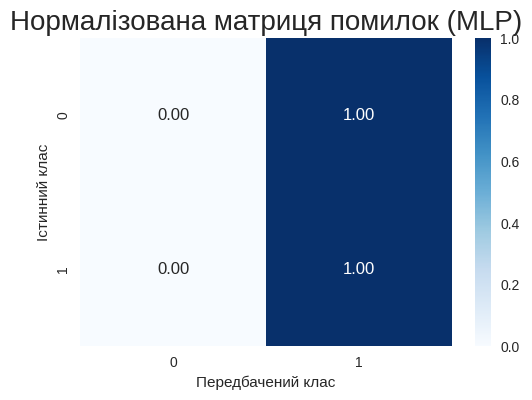

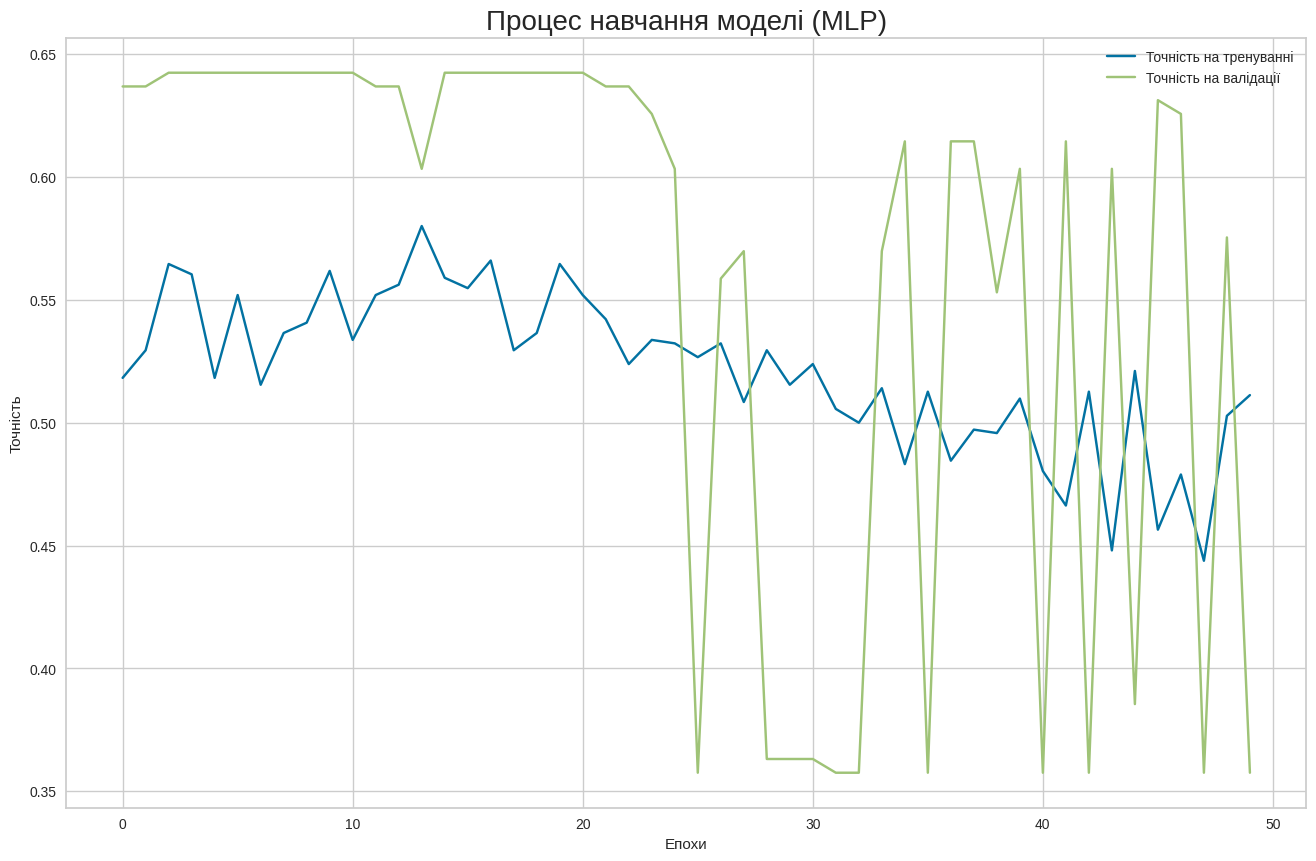

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Побудова моделі MLP
model_MLP = Sequential([
    Dense(64, activation='relu', input_dim=X.shape[1]),  # Вхідний шар + 1-й прихований шар
    Dropout(0.3),  # Регуляризація для запобігання перенавчанню
    Dense(32, activation='relu'),  # 2-й прихований шар
    Dropout(0.3),  # Регуляризація
    Dense(1, activation='sigmoid')  # Вихідний шар для бінарної класифікації
])

# Компіляція моделі
model_MLP.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Навчання моделі
history = model_MLP.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Оцінка моделі
y_pred = (model_MLP.predict(X) > 0.5).astype(int)  # Перетворення ймовірностей у 0 або 1
accuracy = accuracy_score(y, y_pred)
print(f"Точність моделі (MLP): {accuracy:.3f}")

# Матриця помилок
cm = confusion_matrix(y, y_pred)
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Нормалізована матриця помилок (MLP)")
plt.xlabel("Передбачений клас")
plt.ylabel("Істинний клас")
plt.show()

# Графік навчання
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.title('Процес навчання моделі (MLP)')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 457
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

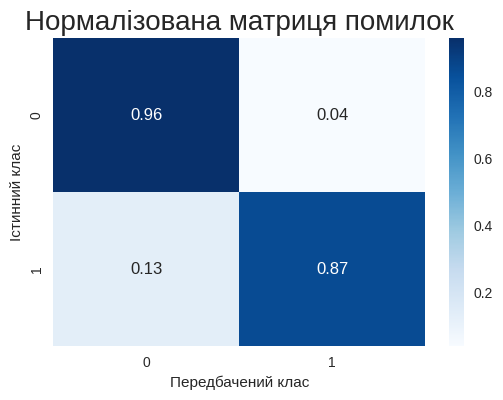

In [ ]:
# LGBMClassifier — це реалізація алгоритму Gradient Boosting, який оптимізовано для швидкості та пам’яті.

# Побудова пайплайну
model_LGBM = Pipeline([
    ('classifier', LGBMClassifier(random_state=0))  # Класифікатор LightGBM
])

# Крос-валідація перед оптимізацією
cv_results = cross_validate(model_LGBM, X, y, cv=5, scoring='accuracy')
score_LGBM = cv_results["test_score"]
print(f"Accuracy (без оптимізації): {score_LGBM.mean():.3f} ± {score_LGBM.std():.3f}")

# Налаштування GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Кількість дерев у моделі
    'classifier__learning_rate': [0.01, 0.1, 0.2],  # Швидкість навчання
    'classifier__max_depth': [3, 5, 7],  # Максимальна глибина дерев
    'classifier__num_leaves': [15, 31, 63]  # Кількість листків
}

grid_search = GridSearchCV(
    estimator=model_LGBM,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Підбір гіперпараметрів
grid_search.fit(X, y)

print(f"Найкраща точність: {grid_search.best_score_:.3f}")
print(f"Найкращі параметри: {grid_search.best_params_}")

# Фінальна модель з найкращими параметрами
best_model = grid_search.best_estimator_
best_model.fit(X, y)

# Передбачення та обчислення accuracy
y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy на тренувальних даних: {accuracy:.3f}")

# Матриця помилок
cm = confusion_matrix(y, y_pred)

# Нормалізована матриця помилок
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Нормалізована матриця помилок")
plt.xlabel("Передбачений клас")
plt.ylabel("Істинний клас")
plt.show()


# У цьому проекті було використано декілька моделей для класифікації даних Titanic:
# 1. Logistic Regression: Базова модель для класифікації з оптимізацією гіперпараметрів.
# 2. XGBClassifier: Алгоритм градієнтного бустингу для підвищення точності.
# 3. CatBoostClassifier: Модель бустингу, оптимізована для роботи з категоріальними ознаками.
# 4. MLP (Multi-Layer Perceptron): Нейронна мережа для обробки табличних даних.
# 5. LGBMClassifier: Алгоритм градієнтного бустингу, що показав найкращі результати.

# Підсумок:
# Найвищу точність продемонструвала модель LGBMClassifier із результатом Accuracy на тренувальних даних: 0.924.
# Модель оптимізована за допомогою GridSearchCV, що забезпечило найкращі гіперпараметри для класифікації.

